## Ramesh Gopinath's TVS Hackathon Submission 2

## Importing Necessary Libraries

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1 Data Cleaning

In [3]:
Train_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Train_Set_TVS.csv")

Test_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Test_Set_TVS.csv")

In [4]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (132440, 33)
Test set shape (56760, 32)


In [5]:
Original_Train_set = Train_set_df.copy()
Original_Test_set = Test_set_df.copy()

In [6]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [7]:
Test_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

In [8]:
def chk_miss(df):

    for i in df.columns:
        percent_missing = df[i].isnull().sum() * 100 / len(df[i])
        if percent_missing:
            print("column is ",i)
            print("% missing",percent_missing)
            print("")

In [9]:
chk_miss(Train_set_df)

column is  Compensation
% missing 4.7130776200543645

column is  Vehicle_Status
% missing 6.874056176381758

column is  Annuity_amt
% missing 3.4815765629719118

column is  density_Ind
% missing 4.089398973119903

column is  Job_Type
% missing 7.73784355179704

column is  Prop_List
% missing 1.4836907278767744

column is  Home_Appliances
% missing 8.278465720326185

column is  Credit_Inq
% missing 2.031108426457264

column is  Experience
% missing 16.49426155240109

column is  Income_Alt
% missing 5.800362428269405

column is  Company_Rating
% missing 8.857595892479614

column is  c1_rated
% missing 13.223346421020839

column is  c2_rated
% missing 10.05813953488372

column is  Contact_age
% missing 6.155995167623074



In [10]:
chk_miss(Test_set_df)  #...... checking for missing values in Test data

column is  Compensation
% missing 4.844961240310077

column is  Vehicle_Status
% missing 6.841085271317829

column is  Annuity_amt
% missing 3.4584214235377027

column is  density_Ind
% missing 4.008104298801973

column is  Job_Type
% missing 7.6109936575052854

column is  Prop_List
% missing 1.6050035236081748

column is  Home_Appliances
% missing 8.384425651867513

column is  Credit_Inq
% missing 2.054263565891473

column is  Experience
% missing 16.47463002114165

column is  Income_Alt
% missing 5.8121916842847074

column is  Company_Rating
% missing 8.902396053558844

column is  c1_rated
% missing 12.97216349541931

column is  c2_rated
% missing 9.963002114164905

column is  Contact_age
% missing 6.20507399577167



In [11]:
# Checking for missing values
print('Number of missing values across columns-\n', Train_set_df.isnull().sum())

Number of missing values across columns-
 ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64


In [12]:
# Checking for missing values in Test set
print('Number of missing values in Test set across columns-\n', Test_set_df.isnull().sum())

Number of missing values in Test set across columns-
 ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64


There are lots of missing rows in the Training_set & Testing set, similar features (columns) seem to be missing data in both Training and Testing it is better to delete these rows in Training and leave them as is in the Testing

Of course these data can also be imputed in Training but in this submission i am going to drop all those training rows

In [13]:
def drop_df(df):

    for i in df.columns:
        test_missing = df[i].isnull().sum() * 100 / len(df[i])
        if test_missing:
            print("column is ",i)
            df[i].replace('', np.nan, inplace=True)
            df.dropna(subset=[i], inplace=True)
            print("")

In [14]:
drop_df(Train_set_df)

column is  Compensation

column is  Vehicle_Status

column is  Annuity_amt

column is  density_Ind

column is  Job_Type

column is  Prop_List

column is  Home_Appliances

column is  Credit_Inq

column is  Experience

column is  Income_Alt

column is  Company_Rating

column is  c1_rated

column is  c2_rated

column is  Contact_age



In [15]:
# Checking for missing values
print('Number of missing values across columns-\n', Train_set_df.isnull().sum())

Number of missing values across columns-
 ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64


Train set has been cleaned up for all the Blank Rows

In [16]:
print("Train set shape after dropping blank rows :",Train_set_df.shape)
print("Test set shape without dropping blank rows  :",Test_set_df.shape)

Train set shape after dropping blank rows : (46784, 33)
Test set shape without dropping blank rows  : (56760, 32)


In [17]:
Train_set_df.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,46784.000000,4.678400e+04,4.678400e+04,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000
mean,488603.161829,7.672948e+05,4.221961e+05,10906.654889,0.020360,3.095289,6.560640,2.239997,2.022935,40.962829,12.185277,0.501548,0.501548,985.904711,3.357708,0.265198
std,58227.207505,4.772499e+05,2.779739e+05,2074.688470,0.014787,1.295899,6.324152,0.940771,0.508534,10.469024,3.593291,0.268455,0.268455,827.247871,2.148828,0.441443
min,387656.000000,1.662120e+05,3.427500e+04,5951.980000,0.000100,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438527.750000,5.363370e+05,2.094405e+05,9410.092500,0.010400,2.000000,2.100000,2.000000,2.000000,32.000000,10.000000,0.263000,0.263000,302.000000,2.000000,0.000000
50%,487052.000000,6.864605e+05,3.554542e+05,10832.710000,0.020200,4.000000,4.600000,2.000000,2.000000,40.000000,12.000000,0.430000,0.430000,779.000000,3.000000,0.000000
75%,538861.250000,8.998065e+05,5.652282e+05,12239.922500,0.030300,4.000000,9.000000,3.000000,2.000000,49.000000,15.000000,0.764000,0.764000,1593.000000,5.000000,1.000000
max,590406.000000,6.305288e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.000000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4165.000000,25.000000,1.000000


There are 46,784 rows now in Train_set after the blank rows cleanup

In [18]:
Test_set_df.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,56760.000000,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,489156.967089,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,58459.598434,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,387653.000000,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,438878.000000,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,488939.500000,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,539700.500000,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,590401.000000,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [19]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

Printing Unique data from the Object datatypes in Train_set

In [20]:
def Unq(df):

    for col in df.select_dtypes(include=['object']).columns:
        print("% S unique values", col)
        print(df[col].value_counts())
        print("")
    

In [21]:
Unq(Train_set_df)

% S unique values Vehicle_Status
N    29358
Y    17426
Name: Vehicle_Status, dtype: int64

% S unique values Job_Type
IT        25556
Non-IT    11374
Govt.      9854
Name: Job_Type, dtype: int64

% S unique values Default_hist
ndf    41278
df      5506
Name: Default_hist, dtype: int64

% S unique values Prop_List
One             30562
Morethan_One    10748
None             5474
Name: Prop_List, dtype: int64

% S unique values Region_Type
Metro    38113
Rural     7774
other      897
Name: Region_Type, dtype: int64

% S unique values Credit_Inq
1     28547
2     13096
>4     3870
3      1271
Name: Credit_Inq, dtype: int64

% S unique values Education_det
Grad      32235
P_Grad    12236
Other      2313
Name: Education_det, dtype: int64

% S unique values Marital_Stat
Married    35105
Single      7379
Divorce     2879
Widow       1421
Name: Marital_Stat, dtype: int64

% S unique values Gen
M    29228
F    17556
Name: Gen, dtype: int64

% S unique values Credit_Lnks
1_to_3    41000
4_to_6  

In [22]:
def hist_df(df):

    for col1 in df.select_dtypes(include=['object']).columns:
        fig = plt.figure(figsize = (10,5))
        plt.rcParams.update({'figure.max_open_warning': 0})
        ax = fig.gca()
        fig.suptitle(col1, fontsize=20)
        sns.histplot(df[col1], kde=True, ax=ax)
    

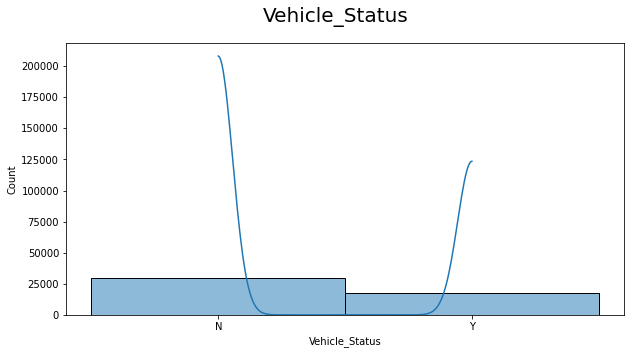

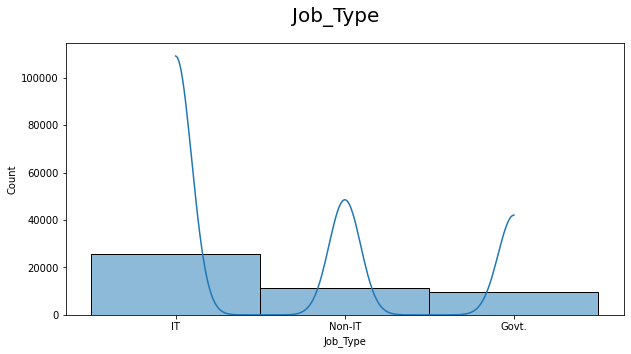

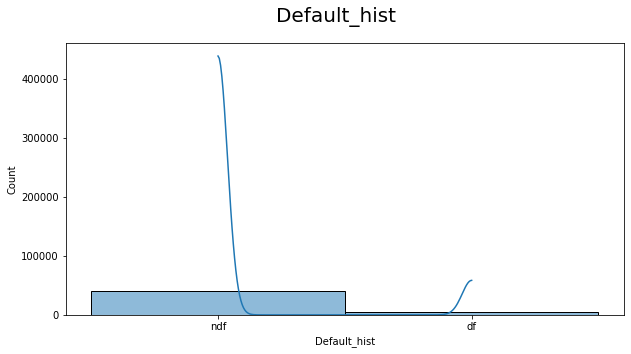

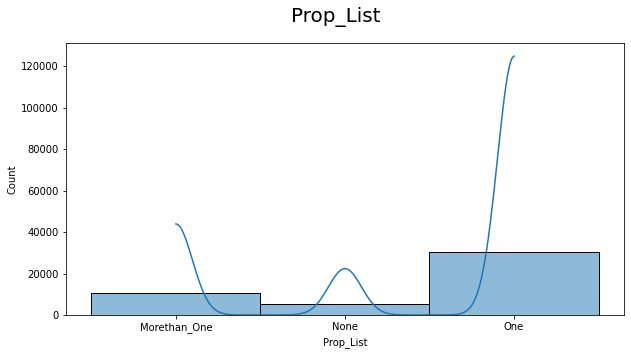

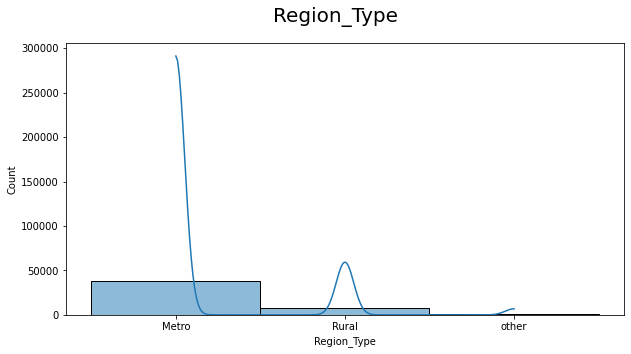

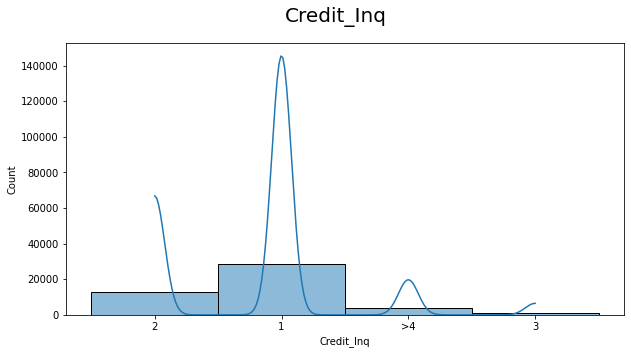

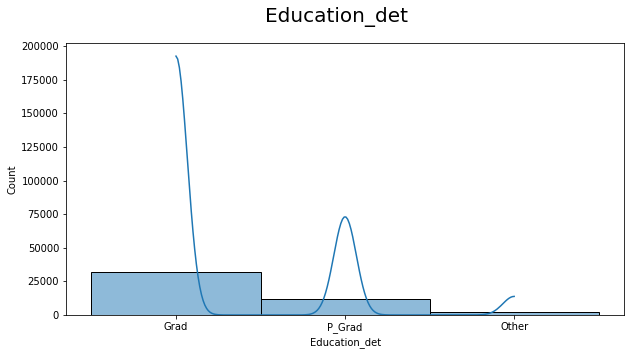

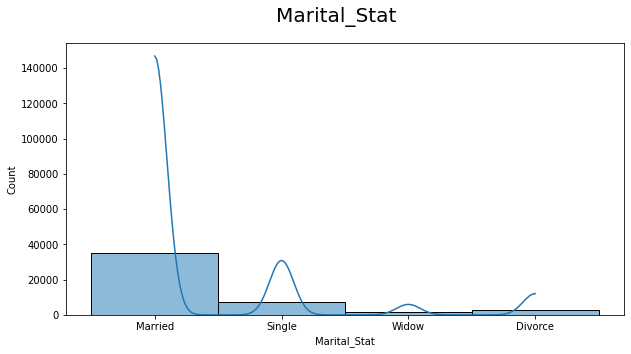

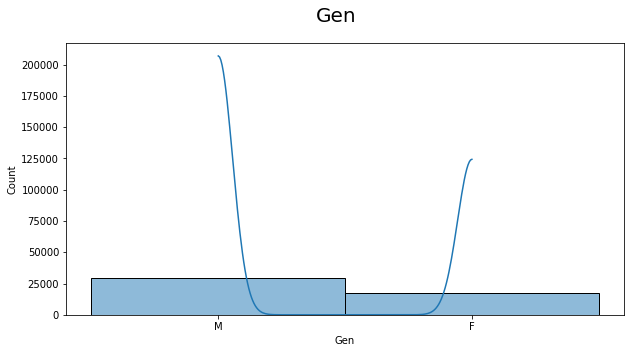

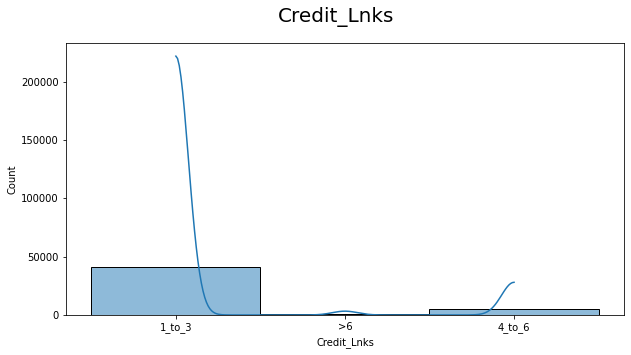

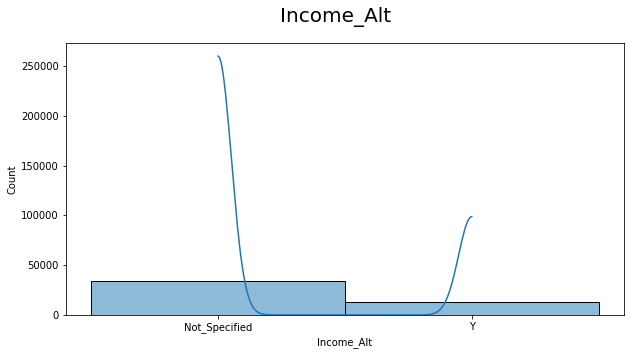

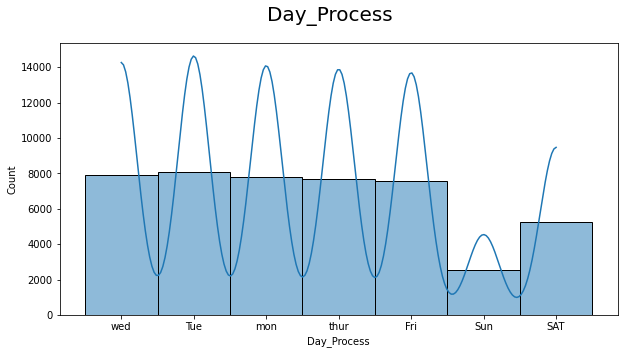

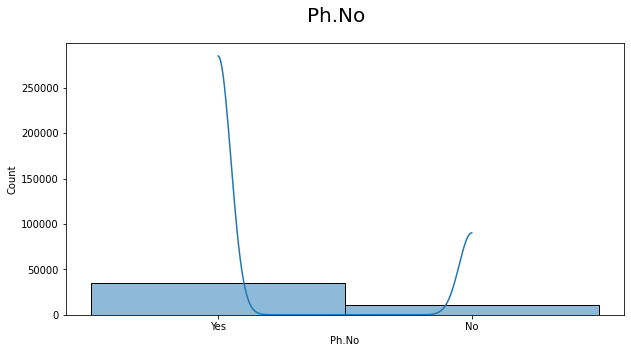

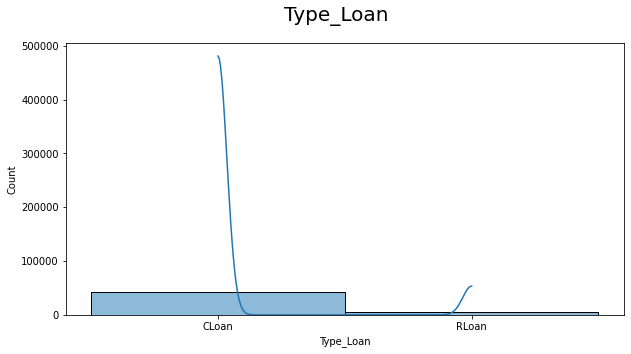

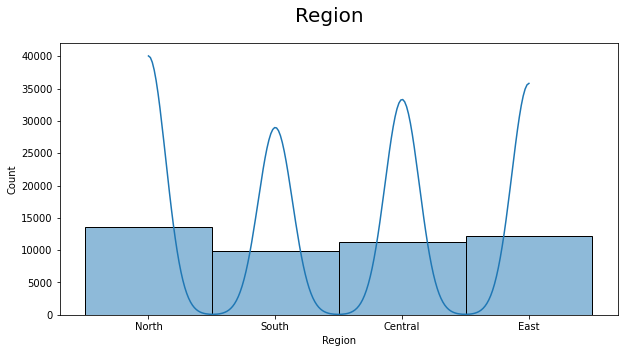

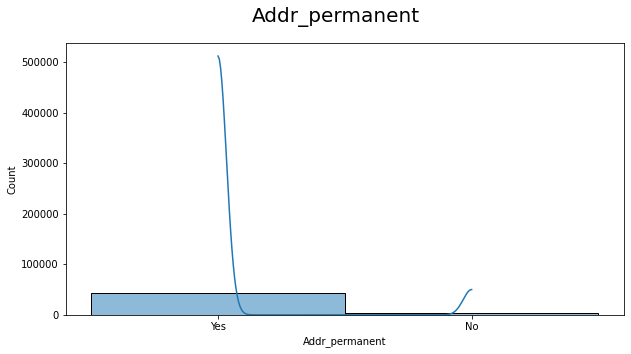

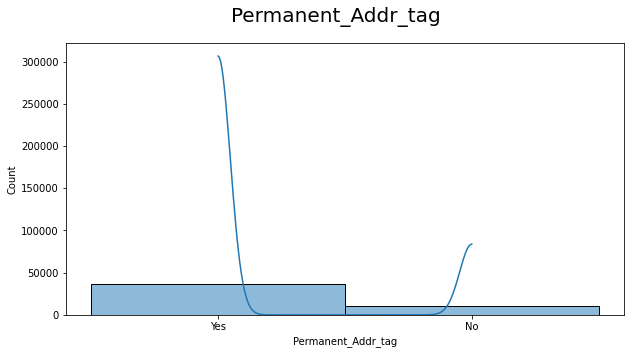

In [23]:
hist_df(Train_set_df)

In [24]:
#Function to accept dataframe and then print pie charts for all Categorical columns

def pie_df(df):
        
    for col2 in df.select_dtypes(include=['object']).columns:
        df.groupby(col2).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')                
        font1 = {'family':'serif','color':'blue','size':20}
        plt.title(col2, fontdict = font1)    
        plt.tight_layout()
        plt.show()


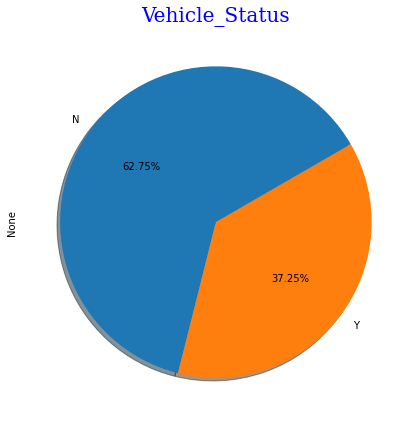

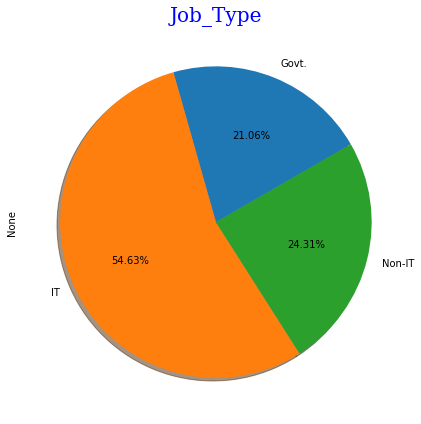

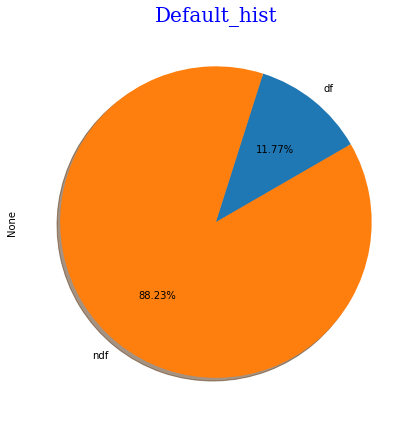

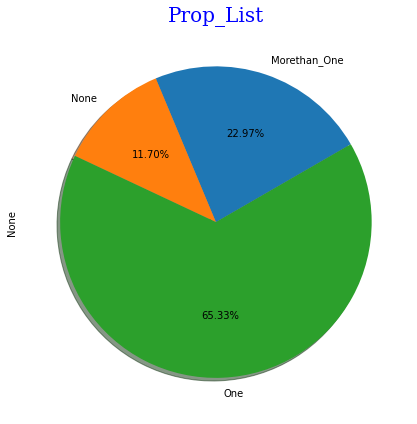

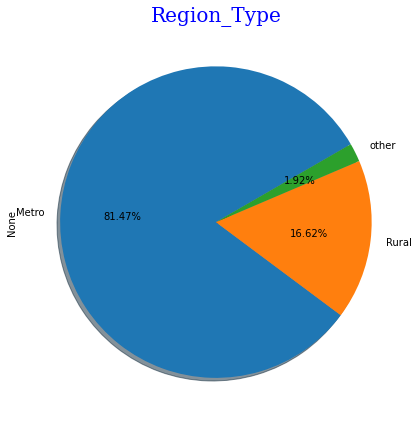

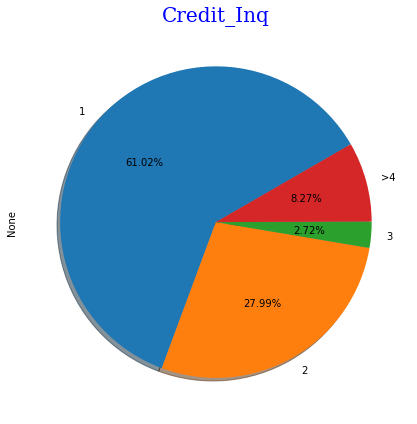

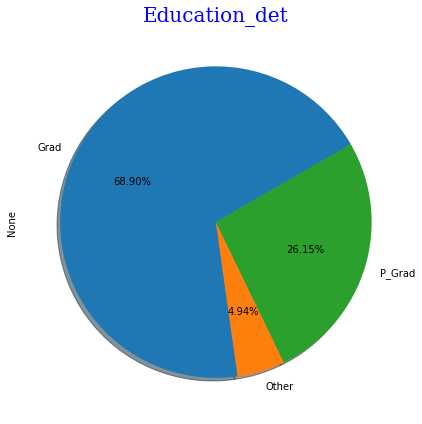

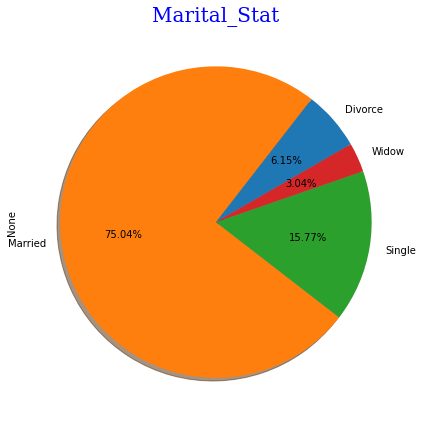

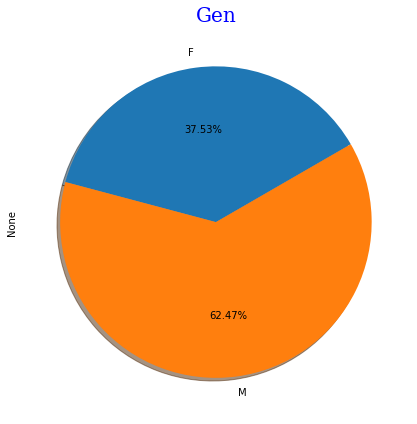

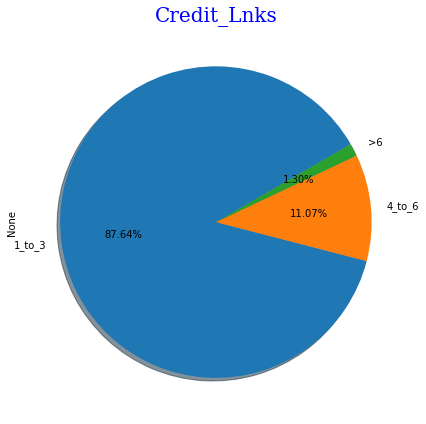

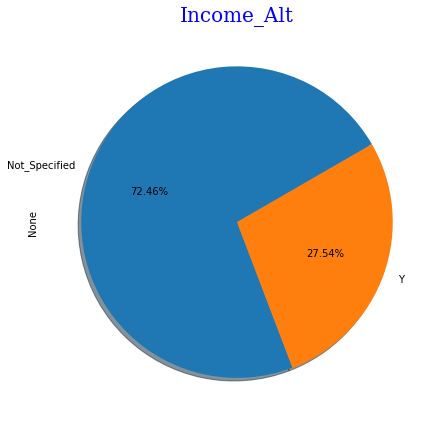

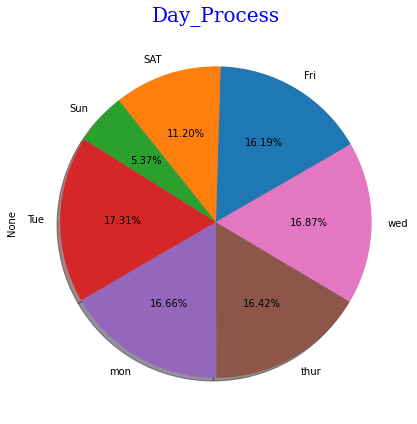

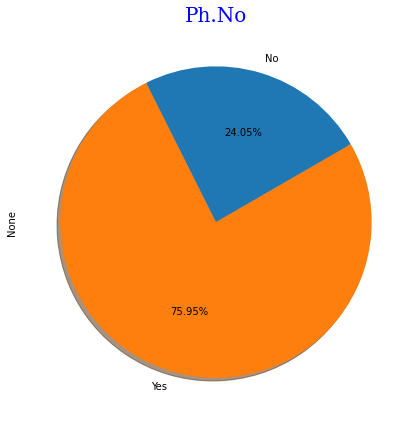

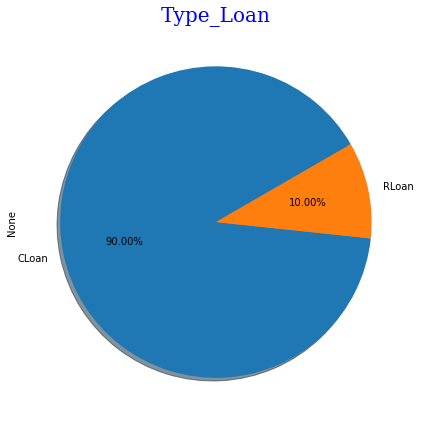

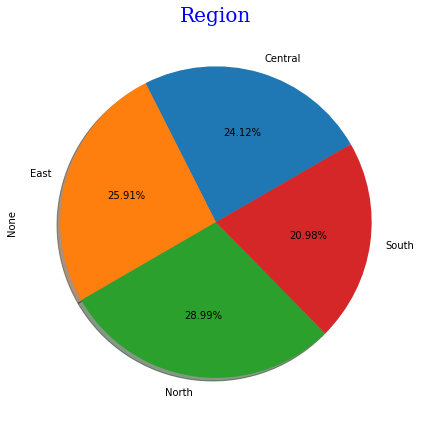

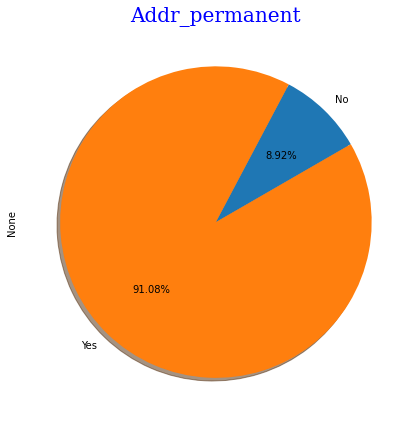

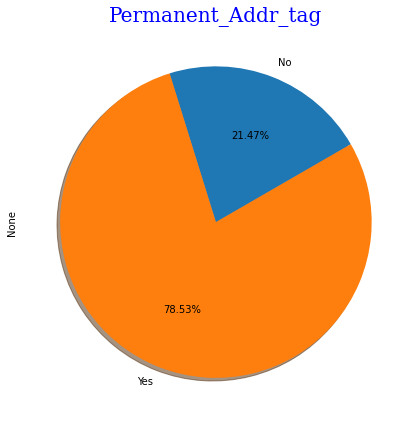

In [25]:
pie_df(Train_set_df)

In [26]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

Dropping the following features since they do not add much value to towards predicting whether a customer will default or not

1. density_ind - Popultion density
2. Marital_Stat - Marital status
3. Gen - Gender
4. Day_Process - Application process day
5. Region - Region of applicant
6. hour_Process - Application process hour

In [27]:
Train_set_df.drop(['density_Ind', 'Marital_Stat', 'Gen', 'Day_Process', 'Region', 'hour_Process'], axis=1, inplace=True)

In [28]:
Train_set_df

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Dependents,Company_Rating,Age,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1,511643,884222.0,N,198075.0,11173.06,IT,ndf,Morethan_One,1.0,Metro,...,3.0,1.0,46.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
6,525234,757887.0,N,977270.0,10708.27,IT,df,None,2.0,Metro,...,4.0,2.0,36.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0
10,495109,733560.0,N,225547.0,9563.82,IT,ndf,One,4.0,Metro,...,3.0,2.0,24.0,Yes,Yes,0.569,0.569,15.0,3.0,1.0
12,410196,864552.0,N,387888.0,8482.38,IT,ndf,One,4.0,Metro,...,1.0,3.0,59.0,Yes,Yes,0.723,0.723,1282.0,1.0,0.0
20,400669,1273392.0,N,400722.0,12955.32,Non-IT,df,None,3.0,Metro,...,5.0,2.0,35.0,Yes,Yes,0.631,0.631,1514.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,419408,265658.0,N,298151.5,12287.54,Govt.,ndf,One,4.0,Metro,...,2.0,2.0,42.0,Yes,Yes,0.680,0.680,311.0,3.0,1.0
132426,505086,817570.0,N,203268.0,9902.40,IT,ndf,One,4.0,Metro,...,2.0,2.0,42.0,Yes,Yes,0.680,0.680,921.0,4.0,1.0
132429,424163,635105.0,N,140250.0,10171.93,Govt.,ndf,One,4.0,Metro,...,2.0,2.0,39.0,Yes,Yes,0.697,0.697,885.0,3.0,0.0
132430,406907,693226.0,N,458448.0,12398.96,IT,ndf,One,4.0,Metro,...,2.0,2.0,40.0,Yes,Yes,0.742,0.742,3492.0,4.0,0.0


In [29]:
# Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct = {
                "Credit_Lnks":        {"1_to_3": 1, "4_to_6": 2, ">6": 3},
                "Education_det":      {"Other": 0, "Grad": 1 , "P_Grad": 2},
                "Credit_Inq":         {"1": 1, "2": 2 , "3": 3, ">4": 5},
                "Prop_List":          {"None": -1, "One": 1, "Morethan_One": 2},
                "Vehicle_Status":     {"Y": 1, "N": 0},                
                "Default_hist":       {"df": 0, "ndf": 1},
                "Income_Alt":         {"Y": 1, "Not_Specified": 0},
                "Addr_permanent":     {"Yes": 1, "No": 0},
                "Permanent_Addr_tag": {"Yes": 1, "No": 0},
                "Ph.No":              {"Yes": 1, "No": 0}
                }
oneHotCols=["Job_Type","Region_Type","Type_Loan"]


In [30]:
replaceStruct

{'Addr_permanent': {'No': 0, 'Yes': 1},
 'Credit_Inq': {'1': 1, '2': 2, '3': 3, '>4': 5},
 'Credit_Lnks': {'1_to_3': 1, '4_to_6': 2, '>6': 3},
 'Default_hist': {'df': 0, 'ndf': 1},
 'Education_det': {'Grad': 1, 'Other': 0, 'P_Grad': 2},
 'Income_Alt': {'Not_Specified': 0, 'Y': 1},
 'Permanent_Addr_tag': {'No': 0, 'Yes': 1},
 'Ph.No': {'No': 0, 'Yes': 1},
 'Prop_List': {'Morethan_One': 2, 'None': -1, 'One': 1},
 'Vehicle_Status': {'N': 0, 'Y': 1}}

In [31]:
oneHotCols

['Job_Type', 'Region_Type', 'Type_Loan']

In [32]:
new_train=Train_set_df.replace(replaceStruct)
new_train=pd.get_dummies(new_train, columns=oneHotCols)
new_train.head(10)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Default_hist,Prop_List,Home_Appliances,Credit_Inq,Education_det,...,Product_bought,Default,Job_Type_Govt.,Job_Type_IT,Job_Type_Non-IT,Region_Type_Metro,Region_Type_Rural,Region_Type_other,Type_Loan_CLoan,Type_Loan_RLoan
1,511643,884222.0,0,198075.0,11173.06,1,2,1.0,2,1,...,4.0,0.0,0,1,0,1,0,0,1,0
6,525234,757887.0,0,977270.0,10708.27,0,-1,2.0,1,1,...,3.0,1.0,0,1,0,1,0,0,1,0
10,495109,733560.0,0,225547.0,9563.82,1,1,4.0,1,1,...,3.0,1.0,0,1,0,1,0,0,1,0
12,410196,864552.0,0,387888.0,8482.38,1,1,4.0,1,1,...,1.0,0.0,0,1,0,1,0,0,1,0
20,400669,1273392.0,0,400722.0,12955.32,0,-1,3.0,2,1,...,3.0,0.0,0,0,1,1,0,0,1,0
21,544155,916864.0,0,1422272.0,15161.99,1,1,4.0,2,1,...,3.0,0.0,0,0,1,1,0,0,1,0
22,564614,705294.0,0,435168.0,10142.68,1,1,4.0,1,1,...,3.0,0.0,1,0,0,1,0,0,1,0
23,564243,672418.0,0,787680.0,10629.67,1,1,4.0,1,2,...,1.0,0.0,0,0,1,0,1,0,1,0
27,483006,424626.0,0,174400.0,11097.34,0,-1,2.0,5,2,...,2.0,0.0,0,1,0,1,0,0,0,1
32,423123,711864.0,0,748544.0,10595.09,1,2,1.0,1,1,...,3.0,0.0,0,1,0,1,0,0,1,0


In [33]:
new_train.describe()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Default_hist,Prop_List,Home_Appliances,Credit_Inq,Education_det,...,Product_bought,Default,Job_Type_Govt.,Job_Type_IT,Job_Type_Non-IT,Region_Type_Metro,Region_Type_Rural,Region_Type_other,Type_Loan_CLoan,Type_Loan_RLoan
count,46784.000000,4.678400e+04,46784.000000,4.678400e+04,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,...,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000,46784.000000
mean,488603.161829,7.672948e+05,0.372478,4.221961e+05,10906.654889,0.882310,0.995725,3.095289,1.665142,1.212102,...,3.357708,0.265198,0.210628,0.546255,0.243117,0.814659,0.166168,0.019173,0.899966,0.100034
std,58227.207505,4.772499e+05,0.483470,2.779739e+05,2074.688470,0.322244,0.835318,1.295899,1.126826,0.515752,...,2.148828,0.441443,0.407759,0.497861,0.428970,0.388578,0.372235,0.137135,0.300049,0.300049
min,387656.000000,1.662120e+05,0.000000,3.427500e+04,5951.980000,0.000000,-1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,438527.750000,5.363370e+05,0.000000,2.094405e+05,9410.092500,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,487052.000000,6.864605e+05,0.000000,3.554542e+05,10832.710000,1.000000,1.000000,4.000000,1.000000,1.000000,...,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,538861.250000,8.998065e+05,1.000000,5.652282e+05,12239.922500,1.000000,1.000000,4.000000,2.000000,2.000000,...,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,590406.000000,6.305288e+07,1.000000,2.872142e+06,41301.000000,1.000000,2.000000,19.000000,5.000000,2.000000,...,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
new_train.dtypes

ID                      int64
Compensation          float64
Vehicle_Status          int64
Loan_amt              float64
Annuity_amt           float64
Default_hist            int64
Prop_List               int64
Home_Appliances       float64
Credit_Inq              int64
Education_det           int64
Credit_Lnks             int64
Experience            float64
Income_Alt              int64
Ph.No                   int64
Dependents            float64
Company_Rating        float64
Age                   float64
Addr_permanent          int64
Permanent_Addr_tag      int64
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
Job_Type_Govt.          uint8
Job_Type_IT             uint8
Job_Type_Non-IT         uint8
Region_Type_Metro       uint8
Region_Type_Rural       uint8
Region_Type_other       uint8
Type_Loan_CLoan         uint8
Type_Loan_RLoan         uint8
dtype: object

In [35]:
new_train.shape

(46784, 32)

In [36]:
new_train

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Default_hist,Prop_List,Home_Appliances,Credit_Inq,Education_det,...,Product_bought,Default,Job_Type_Govt.,Job_Type_IT,Job_Type_Non-IT,Region_Type_Metro,Region_Type_Rural,Region_Type_other,Type_Loan_CLoan,Type_Loan_RLoan
1,511643,884222.0,0,198075.0,11173.06,1,2,1.0,2,1,...,4.0,0.0,0,1,0,1,0,0,1,0
6,525234,757887.0,0,977270.0,10708.27,0,-1,2.0,1,1,...,3.0,1.0,0,1,0,1,0,0,1,0
10,495109,733560.0,0,225547.0,9563.82,1,1,4.0,1,1,...,3.0,1.0,0,1,0,1,0,0,1,0
12,410196,864552.0,0,387888.0,8482.38,1,1,4.0,1,1,...,1.0,0.0,0,1,0,1,0,0,1,0
20,400669,1273392.0,0,400722.0,12955.32,0,-1,3.0,2,1,...,3.0,0.0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,419408,265658.0,0,298151.5,12287.54,1,1,4.0,1,1,...,3.0,1.0,1,0,0,1,0,0,1,0
132426,505086,817570.0,0,203268.0,9902.40,1,1,4.0,1,1,...,4.0,1.0,0,1,0,1,0,0,1,0
132429,424163,635105.0,0,140250.0,10171.93,1,1,4.0,1,1,...,3.0,0.0,1,0,0,1,0,0,1,0
132430,406907,693226.0,0,458448.0,12398.96,1,1,4.0,5,1,...,4.0,0.0,0,1,0,1,0,0,1,0


In [37]:
Train_set_df.duplicated().sum()

0

In [38]:
new_train.duplicated().sum()

0

Carrying out all of the above for Test_set also....

% S unique values Vehicle_Status
N    34721
Y    18156
Name: Vehicle_Status, dtype: int64

% S unique values Job_Type
IT        28792
Non-IT    12640
Govt.     11008
Name: Job_Type, dtype: int64

% S unique values Default_hist
ndf    51070
df      5690
Name: Default_hist, dtype: int64

% S unique values Prop_List
One             39222
Morethan_One    11046
None             5581
Name: Prop_List, dtype: int64

% S unique values Region_Type
Metro    46048
Rural     9526
other     1186
Name: Region_Type, dtype: int64

% S unique values Credit_Inq
1     28703
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

% S unique values Education_det
Grad      40408
P_Grad    13689
Other      2663
Name: Education_det, dtype: int64

% S unique values Marital_Stat
Married    41725
Single      8335
Divorce     3727
Widow       2973
Name: Marital_Stat, dtype: int64

% S unique values Gen
M    37259
F    19501
Name: Gen, dtype: int64

% S unique values Credit_Lnks
1_to_3    50372
4_to_6  

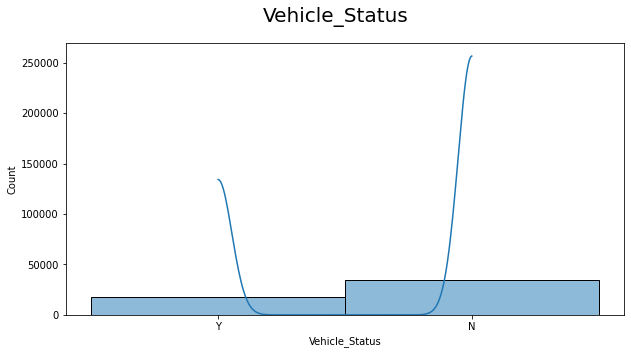

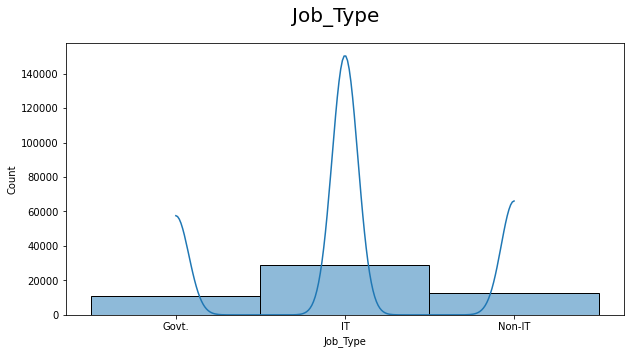

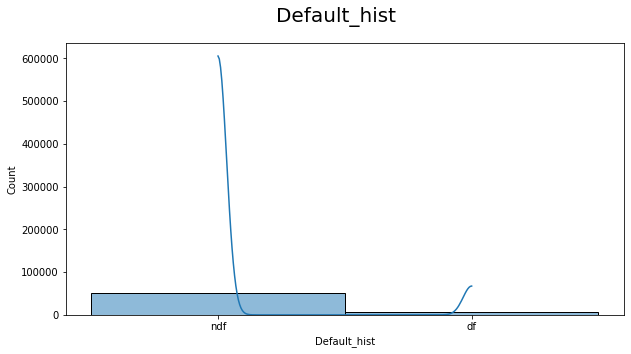

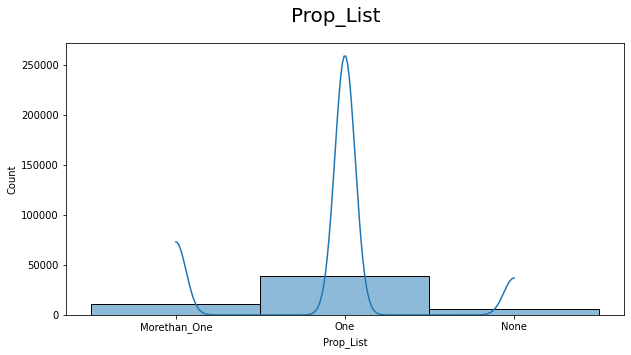

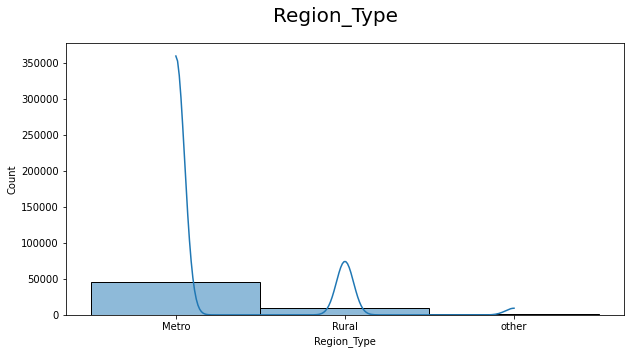

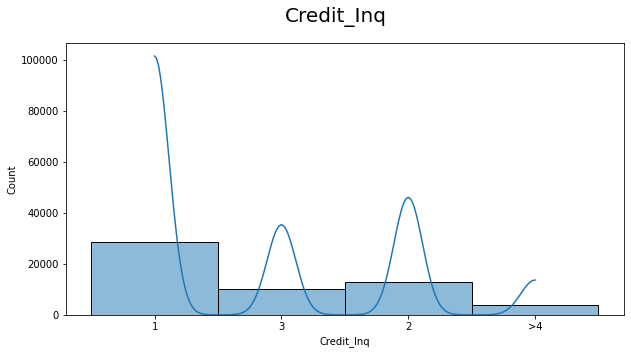

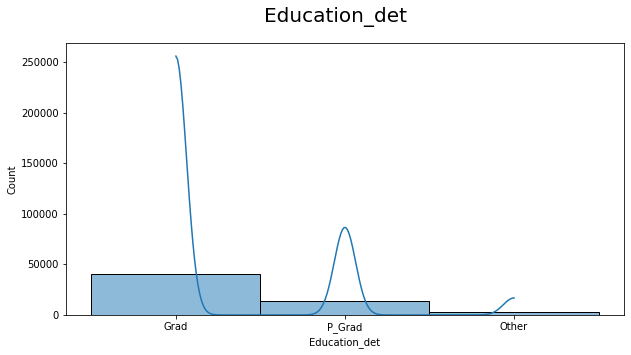

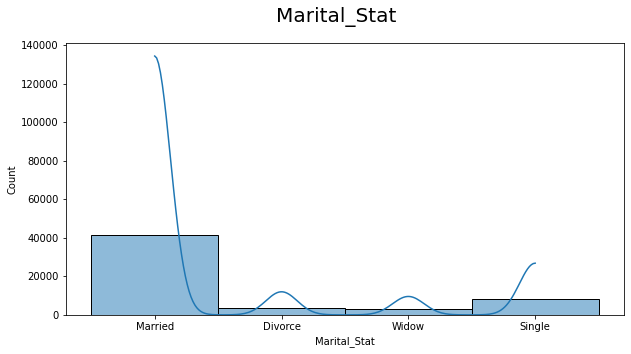

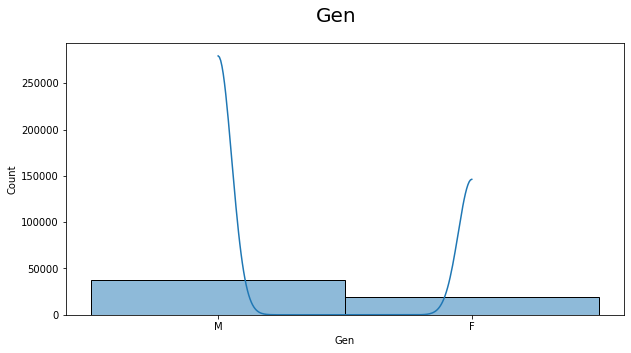

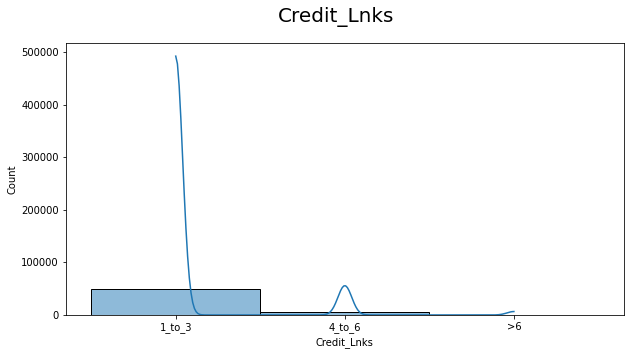

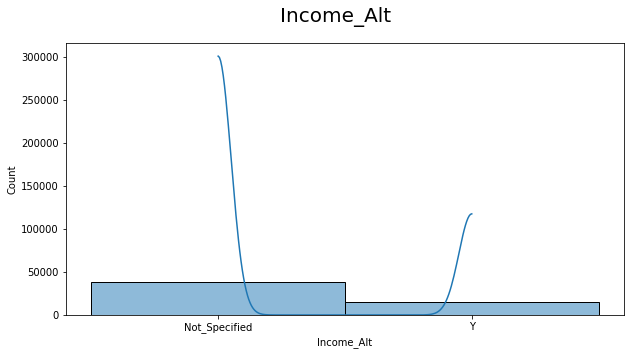

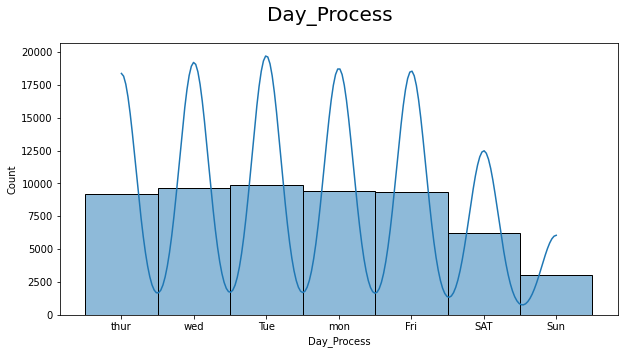

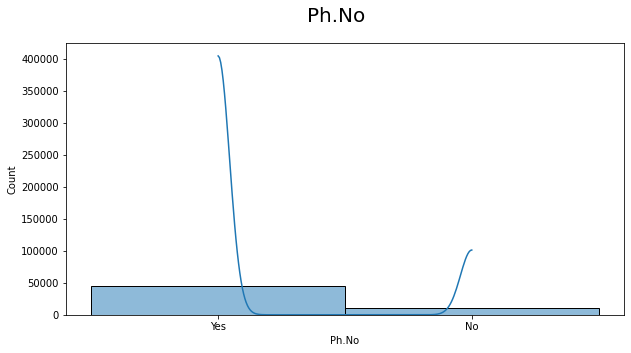

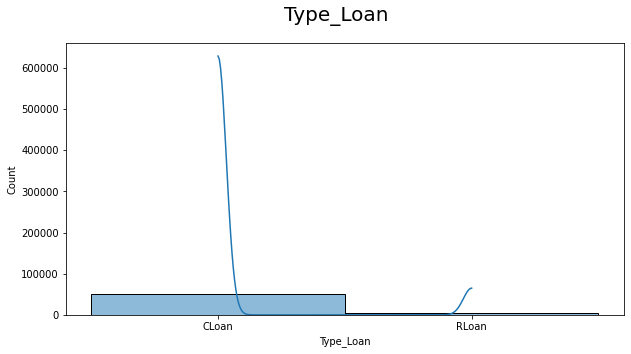

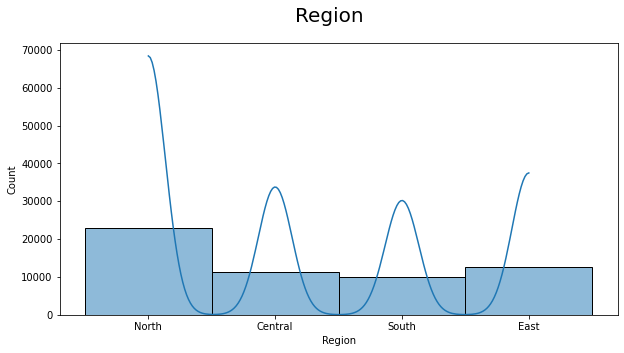

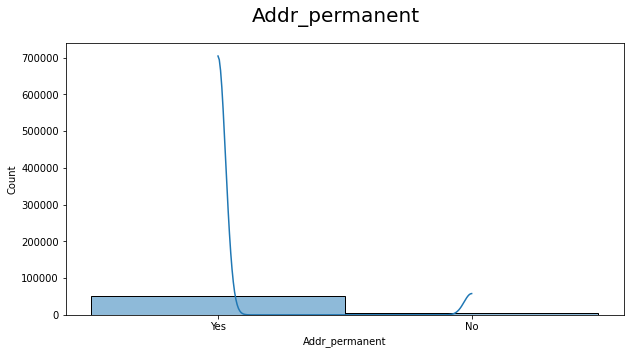

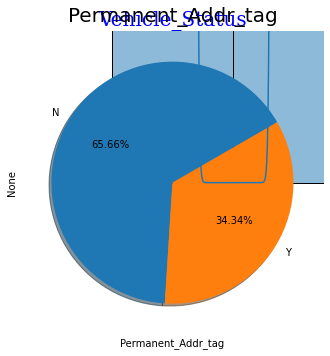

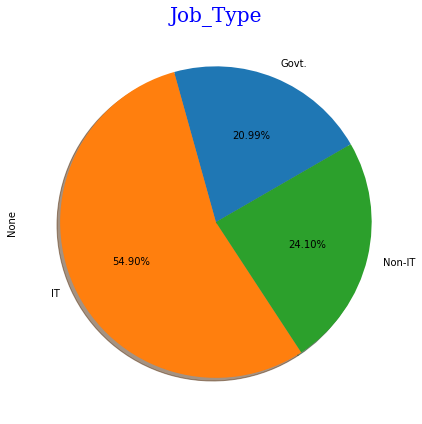

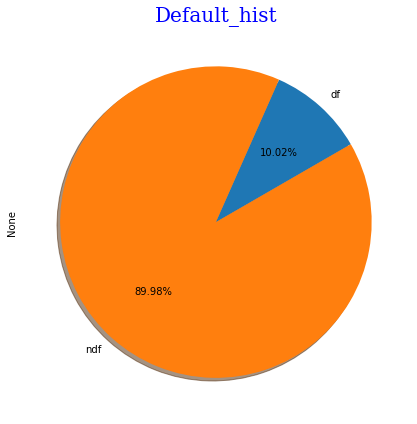

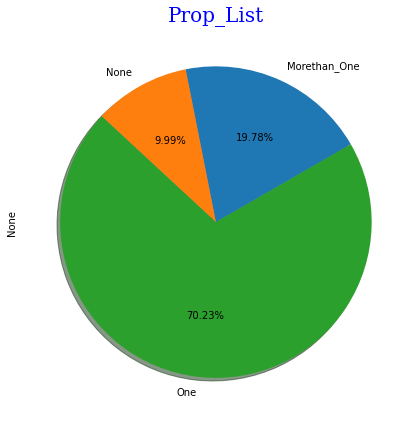

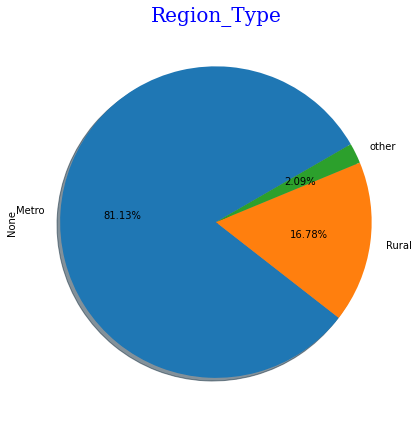

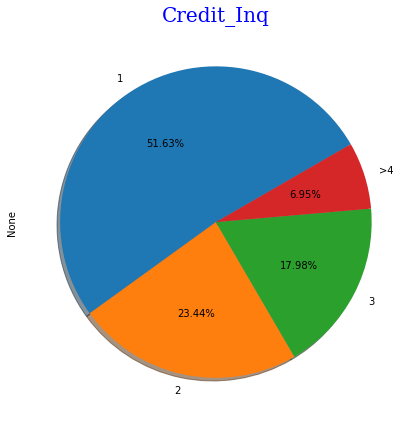

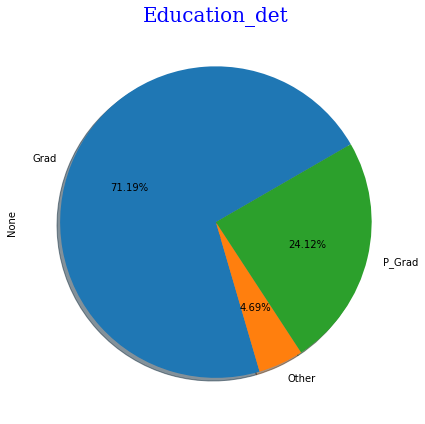

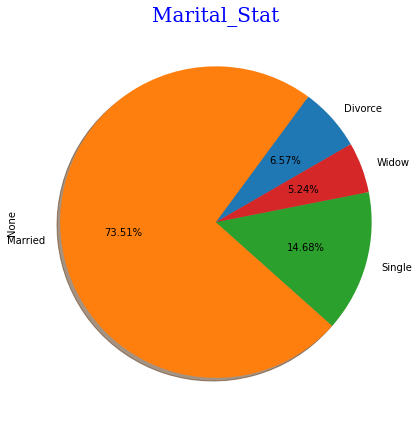

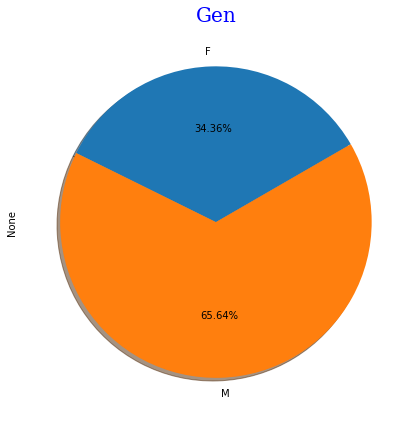

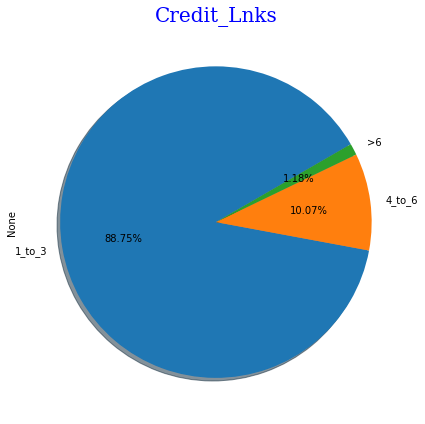

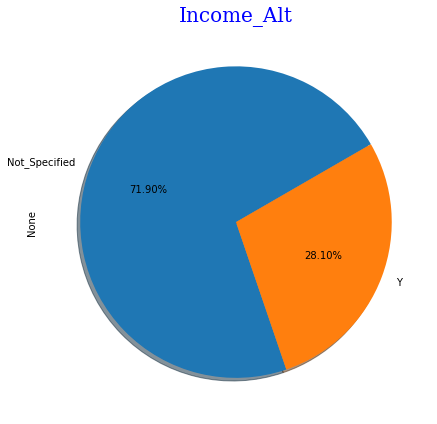

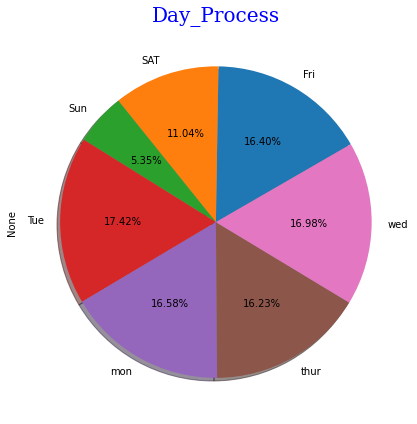

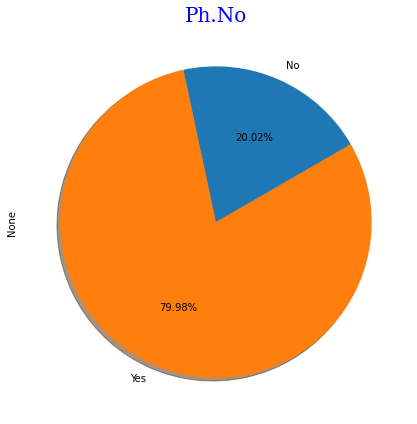

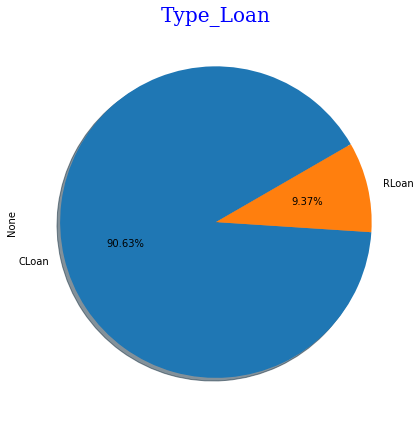

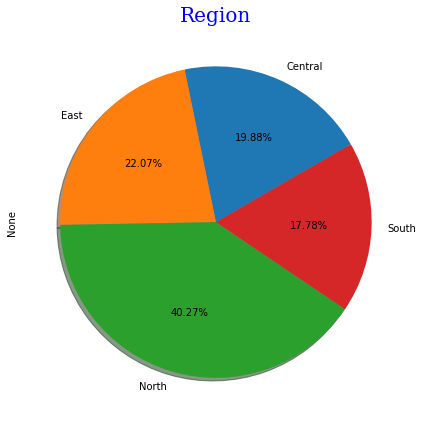

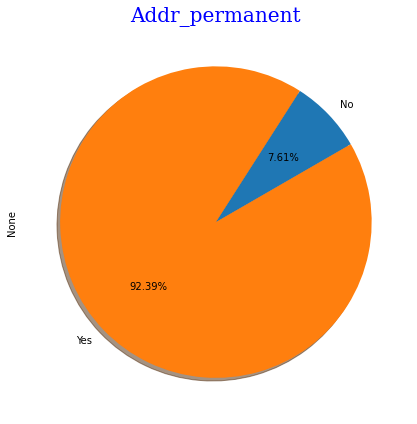

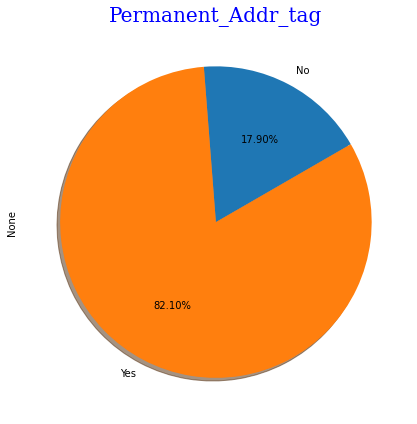

In [39]:
Unq(Test_set_df)
print("")
hist_df(Test_set_df)
print("")
pie_df(Test_set_df)
print("")

In [40]:
Test_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

Dropping the following features since they do not add much value to towards predicting whether a customer will default or not

1. density_ind - Popultion density
2. Marital_Stat - Marital status
3. Gen - Gender
4. Day_Process - Application process day
5. Region - Region of applicant
6. hour_Process - Application process hour

In [41]:
Test_set_df.drop(['density_Ind', 'Marital_Stat', 'Gen', 'Day_Process', 'Region', 'hour_Process'], axis=1, inplace=True)

In [42]:
Test_set_df

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Type_Loan,Dependents,Company_Rating,Age,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,Govt.,ndf,Morethan_One,1.0,Metro,...,CLoan,3.0,2.0,39.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,Govt.,ndf,One,4.0,Metro,...,CLoan,2.0,3.0,46.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,IT,ndf,Morethan_One,NaN,Rural,...,CLoan,3.0,2.0,33.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,IT,ndf,One,4.0,Metro,...,CLoan,2.0,2.0,48.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,Non-IT,ndf,One,4.0,Metro,...,RLoan,2.0,3.0,53.0,Yes,Yes,0.940,0.940,1222.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,671640.0,N,260085.00,9654.50,IT,ndf,One,4.0,Metro,...,CLoan,1.0,2.0,42.0,Yes,Yes,0.716,0.716,215.0,7.0
56756,450327,650680.0,N,714467.60,14063.75,NaN,ndf,One,NaN,Metro,...,CLoan,2.0,3.0,47.0,Yes,Yes,NaN,0.193,22.0,0.0
56757,476417,551374.0,NaN,231420.00,11299.78,Govt.,df,None,2.0,Metro,...,RLoan,3.0,2.0,35.0,No,Yes,0.175,0.175,776.0,5.0
56758,461152,975117.0,N,1096620.00,10223.30,IT,ndf,One,4.0,Metro,...,CLoan,1.0,1.0,22.0,Yes,No,0.669,0.669,873.0,3.0


In [43]:
# Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct1 = {
                "Credit_Lnks":        {"1_to_3": 1, "4_to_6": 2, ">6": 3},
                "Education_det":      {"Other": 0, "Grad": 1 , "P_Grad": 2},
                "Credit_Inq":         {"1": 1, "2": 2 , "3": 3, ">4": 5},
                "Prop_List":          {"None": -1, "One": 1, "Morethan_One": 2},
                "Vehicle_Status":     {"Y": 1, "N": 0},                
                "Default_hist":       {"df": 0, "ndf": 1},
                "Income_Alt":         {"Y": 1, "Not_Specified": 0},
                "Addr_permanent":     {"Yes": 1, "No": 0},
                "Permanent_Addr_tag": {"Yes": 1, "No": 0},
                "Ph.No":              {"Yes": 1, "No": 0}
                }
oneHotCols1=["Job_Type","Region_Type","Type_Loan"]


In [44]:
replaceStruct1

{'Addr_permanent': {'No': 0, 'Yes': 1},
 'Credit_Inq': {'1': 1, '2': 2, '3': 3, '>4': 5},
 'Credit_Lnks': {'1_to_3': 1, '4_to_6': 2, '>6': 3},
 'Default_hist': {'df': 0, 'ndf': 1},
 'Education_det': {'Grad': 1, 'Other': 0, 'P_Grad': 2},
 'Income_Alt': {'Not_Specified': 0, 'Y': 1},
 'Permanent_Addr_tag': {'No': 0, 'Yes': 1},
 'Ph.No': {'No': 0, 'Yes': 1},
 'Prop_List': {'Morethan_One': 2, 'None': -1, 'One': 1},
 'Vehicle_Status': {'N': 0, 'Y': 1}}

In [45]:
oneHotCols1

['Job_Type', 'Region_Type', 'Type_Loan']

In [46]:
new_test=Test_set_df.replace(replaceStruct1)
new_test=pd.get_dummies(new_test, columns=oneHotCols1)
new_test.head(10)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Default_hist,Prop_List,Home_Appliances,Credit_Inq,Education_det,...,Contact_age,Product_bought,Job_Type_Govt.,Job_Type_IT,Job_Type_Non-IT,Region_Type_Metro,Region_Type_Rural,Region_Type_other,Type_Loan_CLoan,Type_Loan_RLoan
0,487410,653106.0,1.0,809400.00,9145.51,1,2.0,1.0,1.0,1,...,3133.0,2.0,1,0,0,1,0,0,1,0
1,533258,434150.0,0.0,72618.75,7683.23,1,1.0,4.0,1.0,1,...,1730.0,5.0,1,0,0,1,0,0,1,0
2,581926,489060.0,0.0,267255.80,9032.85,1,2.0,NaN,1.0,1,...,759.0,4.0,0,1,0,0,1,0,1,0
3,486301,957294.0,0.0,623600.00,12838.25,1,1.0,4.0,1.0,1,...,609.0,4.0,0,1,0,1,0,0,1,0
4,580822,1333739.0,0.0,529520.00,11799.09,1,1.0,4.0,3.0,2,...,1222.0,1.0,0,0,1,1,0,0,0,1
5,542574,594244.0,1.0,290161.50,13318.66,0,-1.0,2.0,2.0,2,...,312.0,3.0,0,1,0,0,1,0,1,0
6,469888,365076.0,1.0,957043.20,16450.51,1,1.0,4.0,3.0,1,...,1147.0,2.0,0,0,1,1,0,0,1,0
7,431366,471086.0,1.0,301011.50,7869.91,1,1.0,4.0,1.0,1,...,838.0,5.0,0,1,0,1,0,0,1,0
8,567067,621504.0,1.0,232066.80,11930.35,1,2.0,1.0,1.0,2,...,1470.0,4.0,0,1,0,1,0,0,1,0
9,483606,564984.0,0.0,462889.00,9792.79,1,1.0,4.0,3.0,1,...,2660.0,2.0,1,0,0,1,0,0,1,0


In [47]:
new_test.describe()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,Default_hist,Prop_List,Home_Appliances,Credit_Inq,Education_det,...,Contact_age,Product_bought,Job_Type_Govt.,Job_Type_IT,Job_Type_Non-IT,Region_Type_Metro,Region_Type_Rural,Region_Type_other,Type_Loan_CLoan,Type_Loan_RLoan
count,56760.000000,5.401000e+04,52877.000000,5.676000e+04,54797.000000,56760.000000,55849.000000,52001.000000,55594.000000,56760.000000,...,53238.00000,56760.000000,56760.000000,56760.000000,56760.000000,56760.000000,56760.000000,56760.000000,56760.000000,56760.000000
mean,489156.967089,7.423110e+05,0.343363,4.145631e+05,10832.334840,0.899753,0.997923,3.220688,1.872001,1.194257,...,971.82118,3.399683,0.193939,0.507259,0.222692,0.811276,0.167829,0.020895,0.906342,0.093658
std,58459.598434,3.764809e+05,0.474836,2.759849e+05,2060.269444,0.300331,0.772988,1.240932,1.142431,0.500359,...,825.51022,2.174527,0.395385,0.499952,0.416057,0.391293,0.373718,0.143034,0.291354,0.291354
min,387653.000000,1.483300e+05,0.000000,3.477750e+04,6061.610000,0.000000,-1.000000,1.000000,1.000000,0.000000,...,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,438878.000000,5.162055e+05,0.000000,2.035587e+05,9344.360000,1.000000,1.000000,2.000000,1.000000,1.000000,...,284.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,488939.500000,6.667440e+05,0.000000,3.488628e+05,10756.450000,1.000000,1.000000,4.000000,1.000000,1.000000,...,767.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,539700.500000,8.770300e+05,1.000000,5.598608e+05,12142.340000,1.000000,1.000000,4.000000,2.000000,1.000000,...,1579.00000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,590401.000000,1.727617e+07,1.000000,2.743640e+06,38116.000000,1.000000,2.000000,19.000000,5.000000,2.000000,...,4109.00000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
new_test.shape

(56760, 31)

In [49]:
new_test.duplicated().sum()

0

In [50]:
Test_set_df.duplicated().sum()

0

There are no duplicated rows in Test_set too.....

In [51]:
new_train.shape

(46784, 32)

In [52]:
new_test.shape

(56760, 31)

new_train dataframe has an extra column because it has Default

new_test dataframe does not have that column, as we have to predict that columm

Now both new_train and new_test has been setup to do Exploratory data analysis and then model building

In [53]:
stddev_drop_cols = 0

def std_dev(df):

    for i in df.columns:
        if (i == 'Default'):
            print("Skipping")
        else:    
            std_dev = df[i].std()
            if ( std_dev == 0):
                #signal_df.drop(i,axis=1,inplace=True)            
                stddev_drop_cols = stddev_drop_cols+1
                print(stddev_drop_cols)
        

In [54]:
std_dev(new_train)

Skipping


In [55]:
stddev_drop_cols  #........... there is no features in new_train with std deviation as 0

0

In [56]:
#...... Checking for the features in which variance is less than or equal to 2%

var_drop_cols = 0
#variable = [ ]
variable_df = pd.DataFrame(columns = ['column', 'variance'])
ind = 0

for i in new_train.columns:
    if (i == 'Default'):
        print("Skipping")
    else:    
        var = new_train[i].var() * 100
        print("column is",i)
        print("variance of column is",var)
        tempResultsDf = pd.DataFrame({'column':i,'variance': var}, index=[ind])
        ind = ind+1
            
        variable_df = pd.concat([variable_df, tempResultsDf])
            
        variable_df = variable_df[['column','variance']]
            
        #variable.append(i,var)
        if ( var <= 0.02):
            #signal_df.drop(i,axis=1,inplace=True)      #..... dropping columns with variance less than 2%
            var_drop_cols = var_drop_cols+1
    print("var_drop_cols",var_drop_cols)

column is ID
variance of column is 339040769380.21454
var_drop_cols 0
column is Compensation
variance of column is 22776743172097.51
var_drop_cols 0
column is Vehicle_Status
variance of column is 23.37430771194875
var_drop_cols 0
column is Loan_amt
variance of column is 7726950301574.222
var_drop_cols 0
column is Annuity_amt
variance of column is 430433224.75320315
var_drop_cols 0
column is Default_hist
variance of column is 10.384113704766015
var_drop_cols 0
column is Prop_List
variance of column is 69.77565570151539
var_drop_cols 0
column is Home_Appliances
variance of column is 167.9353647540484
var_drop_cols 0
column is Credit_Inq
variance of column is 126.97371578905232
var_drop_cols 0
column is Education_det
variance of column is 26.60006328188479
var_drop_cols 0
column is Credit_Lnks
variance of column is 14.389730571027457
var_drop_cols 0
column is Experience
variance of column is 3999.489265788683
var_drop_cols 0
column is Income_Alt
variance of column is 19.95656959872038
var

there is no features in new_train with variance less than 2%

In [57]:
#........ Bivariate checking of all predictors with target (Default) column

corr_drop_cols = 0
corr_df = pd.DataFrame(columns = ['column', 'correlation'])
ind = 0

for i in new_train.columns:
    if (i == 'Default'):
        print("Skipping")
    else:
        corr_val = new_train['Default'].corr(new_train[i])
        corr_val = round(corr_val,3)
        print("column is",i)
        print("correlation of column is",corr_val)
        tempResultsDf = pd.DataFrame({'column':i,'correlation': corr_val}, index=[ind])
        ind = ind+1
            
        corr_df = pd.concat([corr_df, tempResultsDf])
            
        corr_df = corr_df[['column','correlation']]

column is ID
correlation of column is 0.001
column is Compensation
correlation of column is -0.004
column is Vehicle_Status
correlation of column is -0.012
column is Loan_amt
correlation of column is -0.007
column is Annuity_amt
correlation of column is -0.004
column is Default_hist
correlation of column is 0.001
column is Prop_List
correlation of column is 0.002
column is Home_Appliances
correlation of column is -0.001
column is Credit_Inq
correlation of column is -0.005
column is Education_det
correlation of column is -0.022
column is Credit_Lnks
correlation of column is 0.012
column is Experience
correlation of column is -0.021
column is Income_Alt
correlation of column is 0.001
column is Ph.No
correlation of column is -0.008
column is Dependents
correlation of column is -0.0
column is Company_Rating
correlation of column is 0.02
column is Age
correlation of column is -0.019
column is Addr_permanent
correlation of column is -0.018
column is Permanent_Addr_tag
correlation of column i

In [58]:
corr_df

,column,correlation
0,ID,0.001
1,Compensation,-0.004
2,Vehicle_Status,-0.012
3,Loan_amt,-0.007
4,Annuity_amt,-0.004
5,Default_hist,0.001
6,Prop_List,0.002
7,Home_Appliances,-0.001
8,Credit_Inq,-0.005
9,Education_det,-0.022


#2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

###Univariate Analysis

In [59]:
def chk_box(df):

    for i in df.columns:    
        print("column is",i)
        fig = plt.figure(figsize = (6,4))
        plt.figure(i)
        fig.suptitle(i, fontsize=20)
        df[i].plot.box()
        plt.show()
    

column is ID


<Figure size 432x288 with 0 Axes>

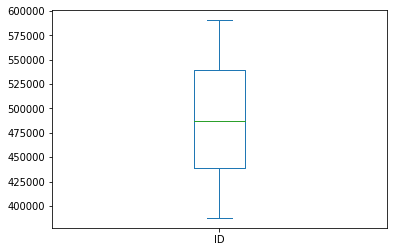

column is Compensation


<Figure size 432x288 with 0 Axes>

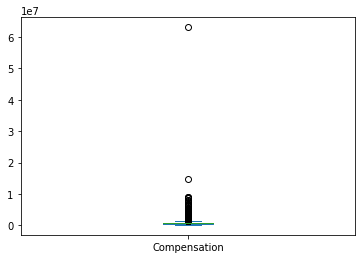

column is Vehicle_Status


<Figure size 432x288 with 0 Axes>

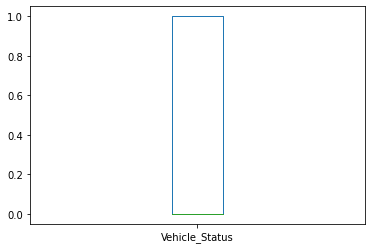

column is Loan_amt


<Figure size 432x288 with 0 Axes>

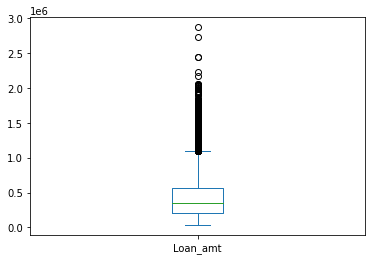

column is Annuity_amt


<Figure size 432x288 with 0 Axes>

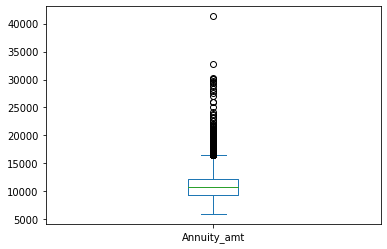

column is Default_hist


<Figure size 432x288 with 0 Axes>

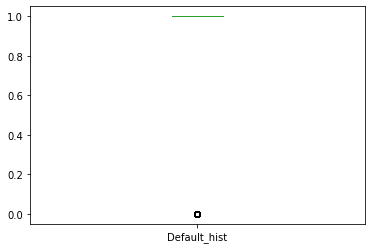

column is Prop_List


<Figure size 432x288 with 0 Axes>

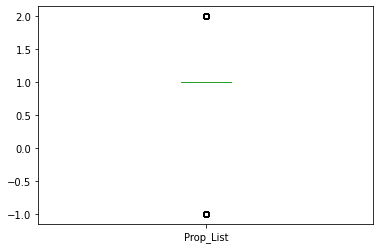

column is Home_Appliances


<Figure size 432x288 with 0 Axes>

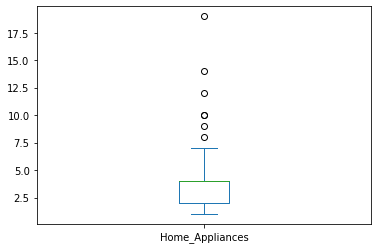

column is Credit_Inq


<Figure size 432x288 with 0 Axes>

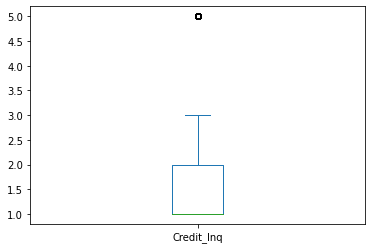

column is Education_det


<Figure size 432x288 with 0 Axes>

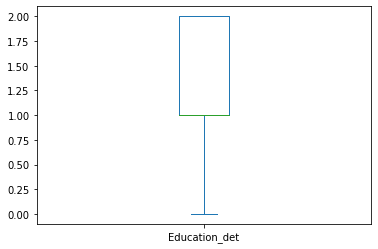

column is Credit_Lnks


<Figure size 432x288 with 0 Axes>

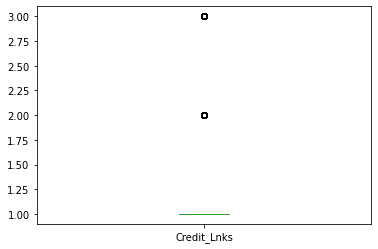

column is Experience


<Figure size 432x288 with 0 Axes>

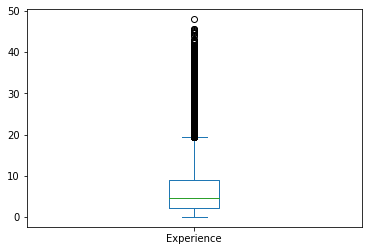

column is Income_Alt


<Figure size 432x288 with 0 Axes>

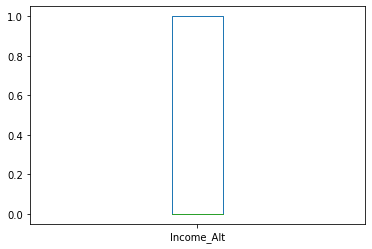

column is Ph.No


<Figure size 432x288 with 0 Axes>

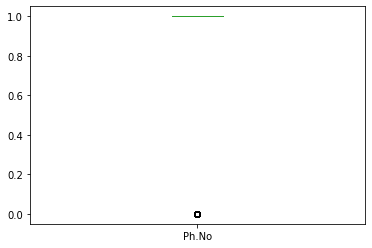

column is Dependents


<Figure size 432x288 with 0 Axes>

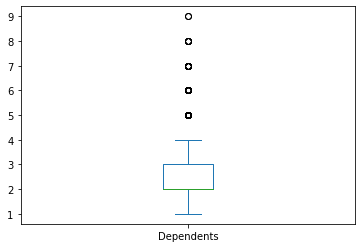

column is Company_Rating


<Figure size 432x288 with 0 Axes>

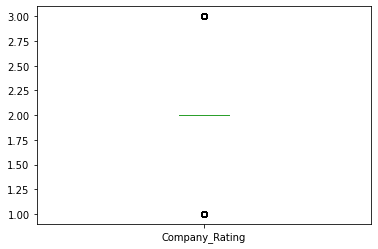

column is Age


<Figure size 432x288 with 0 Axes>

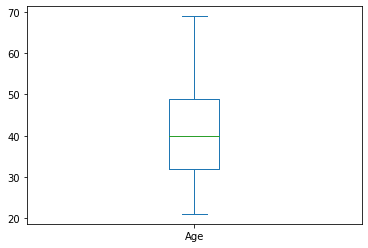

column is Addr_permanent


<Figure size 432x288 with 0 Axes>

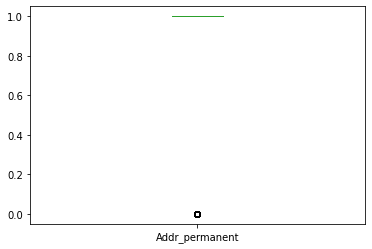

column is Permanent_Addr_tag


<Figure size 432x288 with 0 Axes>

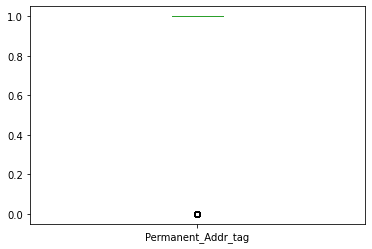

column is c1_rated


<Figure size 432x288 with 0 Axes>

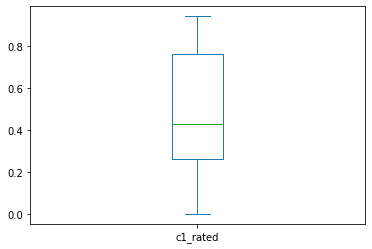

column is c2_rated


<Figure size 432x288 with 0 Axes>

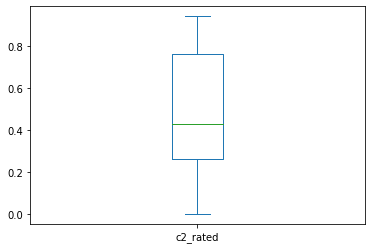

column is Contact_age


<Figure size 432x288 with 0 Axes>

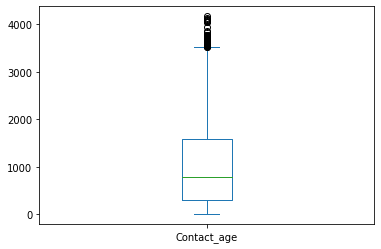

column is Product_bought


<Figure size 432x288 with 0 Axes>

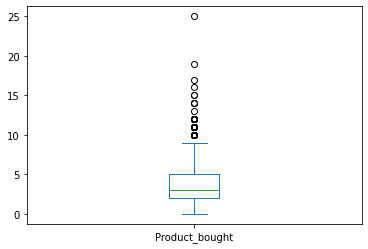

column is Default


<Figure size 432x288 with 0 Axes>

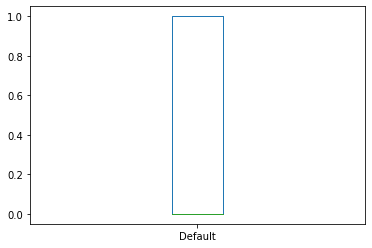

column is Job_Type_Govt.


<Figure size 432x288 with 0 Axes>

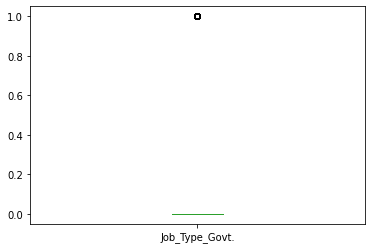

column is Job_Type_IT


<Figure size 432x288 with 0 Axes>

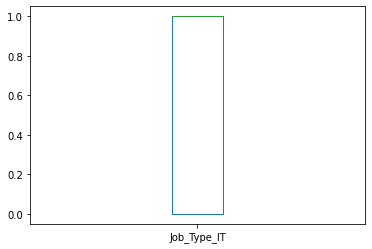

column is Job_Type_Non-IT


<Figure size 432x288 with 0 Axes>

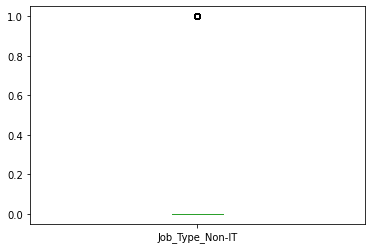

column is Region_Type_Metro


<Figure size 432x288 with 0 Axes>

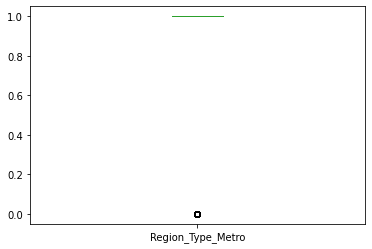

column is Region_Type_Rural


<Figure size 432x288 with 0 Axes>

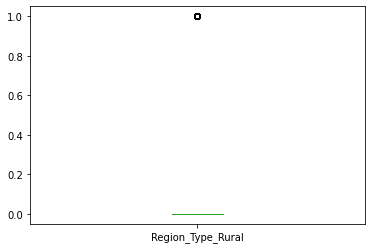

column is Region_Type_other


<Figure size 432x288 with 0 Axes>

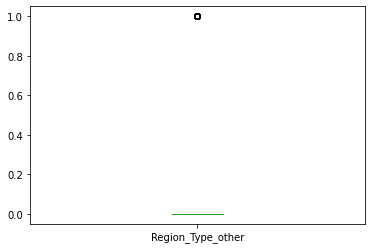

column is Type_Loan_CLoan


<Figure size 432x288 with 0 Axes>

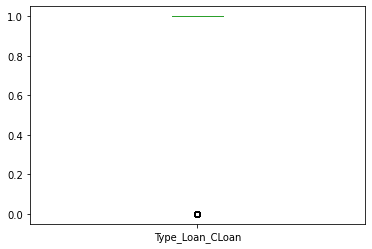

column is Type_Loan_RLoan


<Figure size 432x288 with 0 Axes>

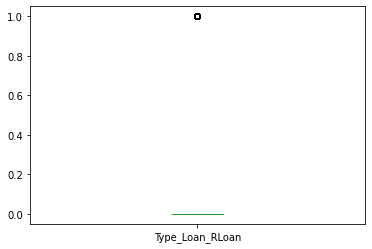

In [60]:
chk_box(new_train)

column is ID


<Figure size 432x288 with 0 Axes>

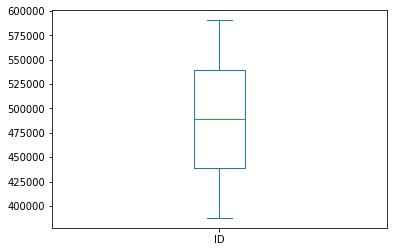

column is Compensation


<Figure size 432x288 with 0 Axes>

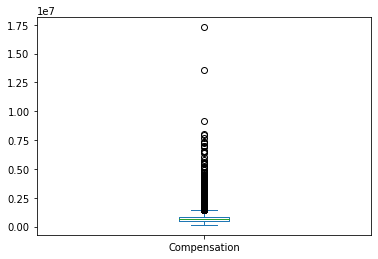

column is Vehicle_Status


<Figure size 432x288 with 0 Axes>

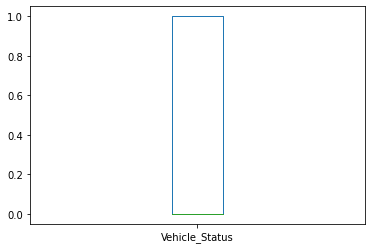

column is Loan_amt


<Figure size 432x288 with 0 Axes>

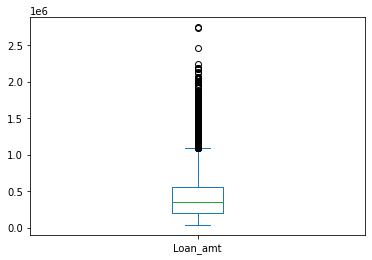

column is Annuity_amt


<Figure size 432x288 with 0 Axes>

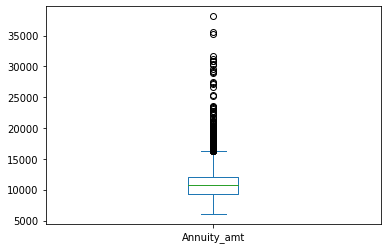

column is Default_hist


<Figure size 432x288 with 0 Axes>

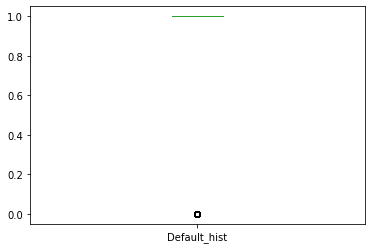

column is Prop_List


<Figure size 432x288 with 0 Axes>

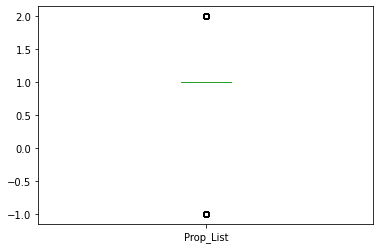

column is Home_Appliances


<Figure size 432x288 with 0 Axes>

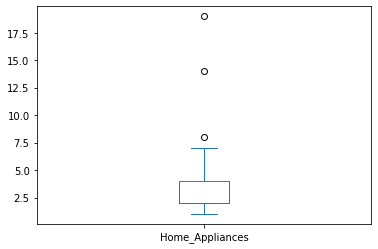

column is Credit_Inq


<Figure size 432x288 with 0 Axes>

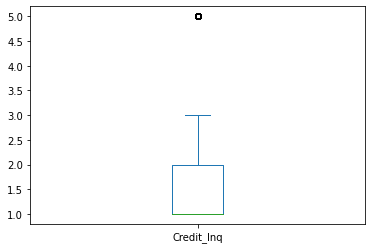

column is Education_det


<Figure size 432x288 with 0 Axes>

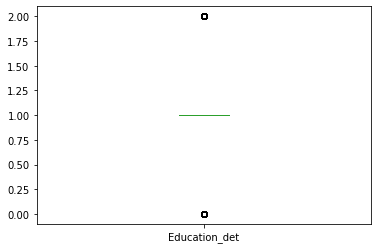

column is Credit_Lnks


<Figure size 432x288 with 0 Axes>

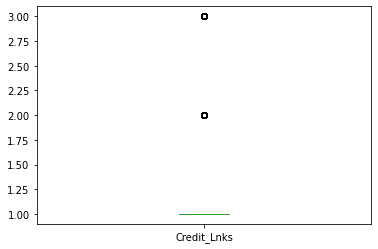

column is Experience


<Figure size 432x288 with 0 Axes>

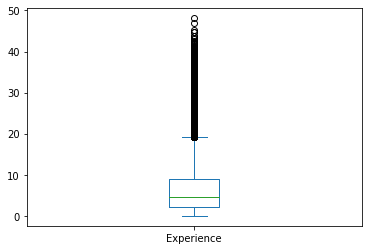

column is Income_Alt


<Figure size 432x288 with 0 Axes>

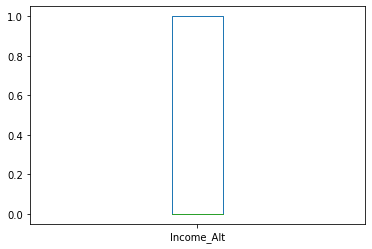

column is Ph.No


<Figure size 432x288 with 0 Axes>

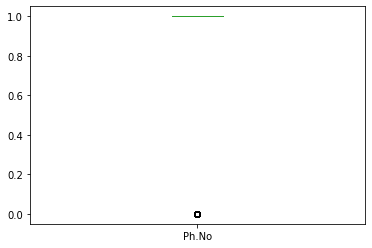

column is Dependents


<Figure size 432x288 with 0 Axes>

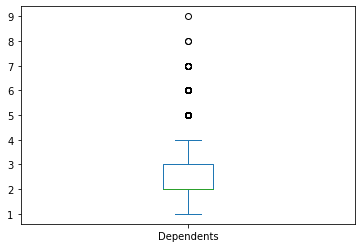

column is Company_Rating


<Figure size 432x288 with 0 Axes>

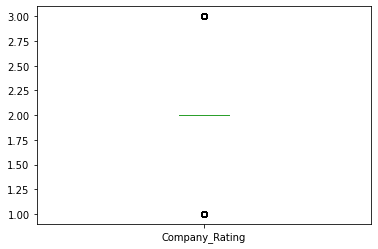

column is Age


<Figure size 432x288 with 0 Axes>

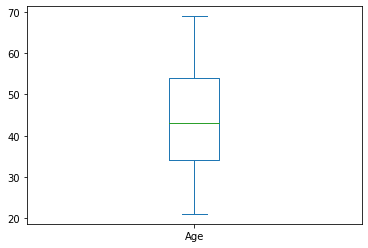

column is Addr_permanent


<Figure size 432x288 with 0 Axes>

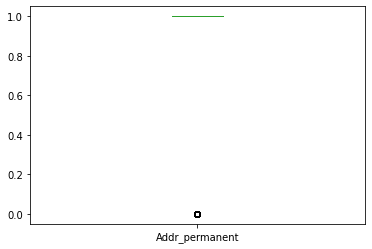

column is Permanent_Addr_tag


<Figure size 432x288 with 0 Axes>

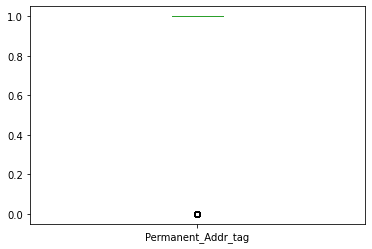

column is c1_rated


<Figure size 432x288 with 0 Axes>

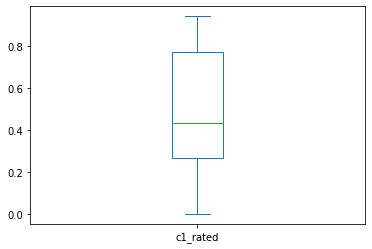

column is c2_rated


<Figure size 432x288 with 0 Axes>

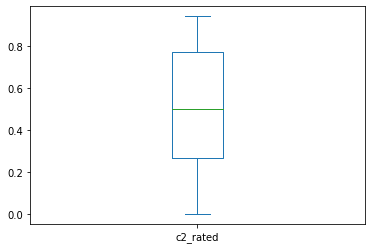

column is Contact_age


<Figure size 432x288 with 0 Axes>

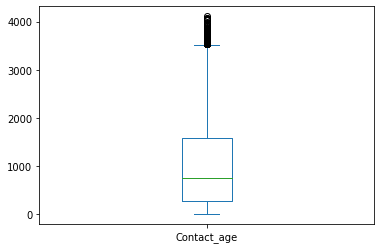

column is Product_bought


<Figure size 432x288 with 0 Axes>

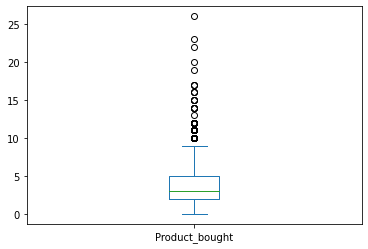

column is Job_Type_Govt.


<Figure size 432x288 with 0 Axes>

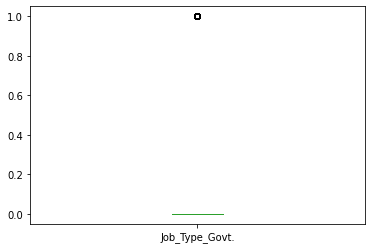

column is Job_Type_IT


<Figure size 432x288 with 0 Axes>

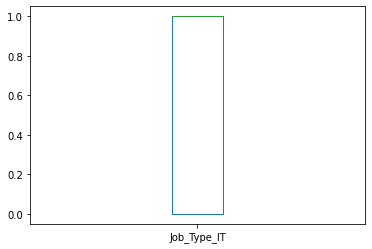

column is Job_Type_Non-IT


<Figure size 432x288 with 0 Axes>

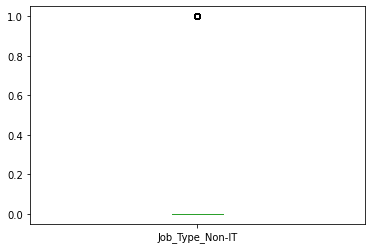

column is Region_Type_Metro


<Figure size 432x288 with 0 Axes>

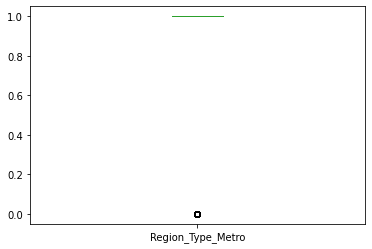

column is Region_Type_Rural


<Figure size 432x288 with 0 Axes>

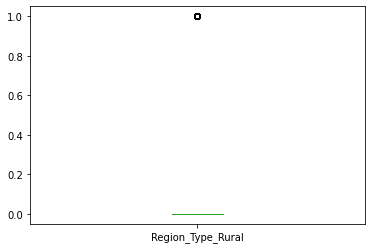

column is Region_Type_other


<Figure size 432x288 with 0 Axes>

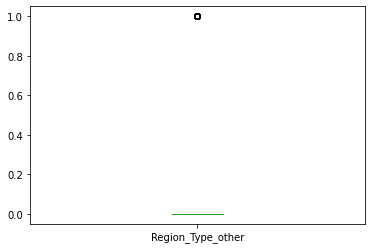

column is Type_Loan_CLoan


<Figure size 432x288 with 0 Axes>

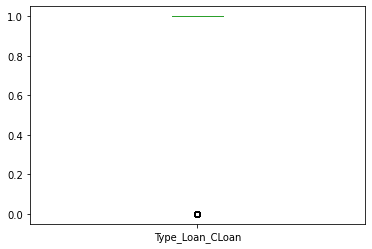

column is Type_Loan_RLoan


<Figure size 432x288 with 0 Axes>

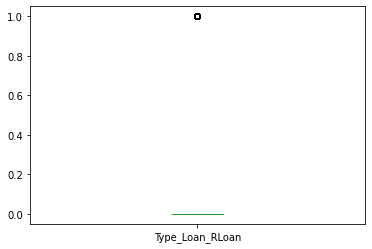

In [61]:
chk_box(new_test)

column is ID


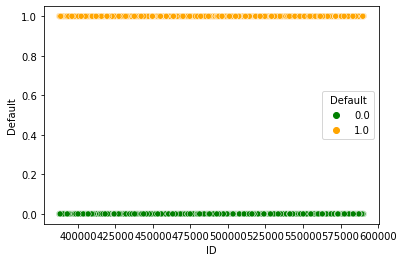

column is Compensation


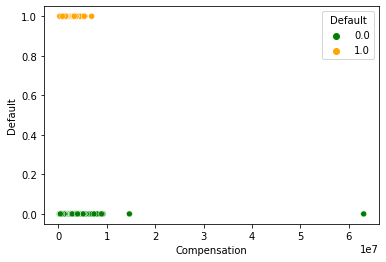

column is Vehicle_Status


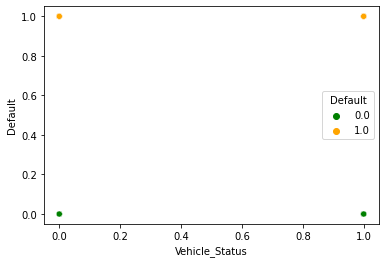

column is Loan_amt


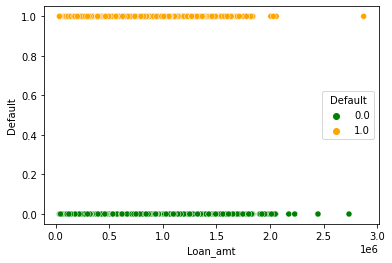

column is Annuity_amt


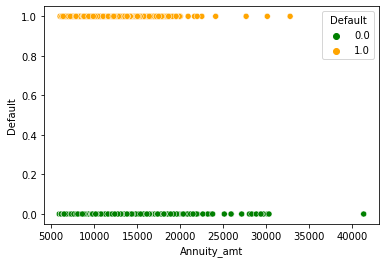

column is Default_hist


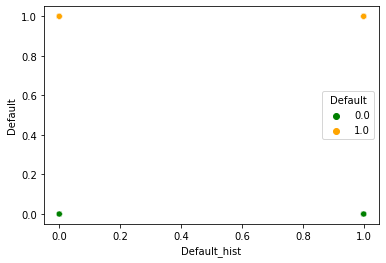

column is Prop_List


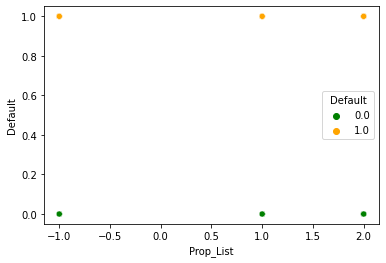

column is Home_Appliances


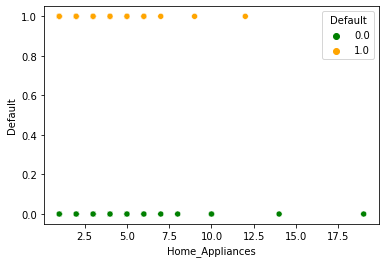

column is Credit_Inq


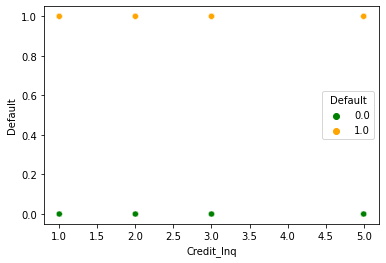

column is Education_det


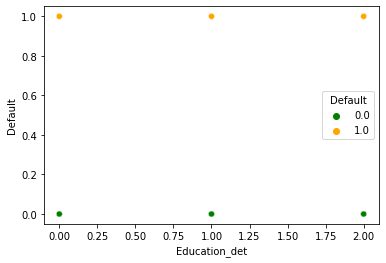

column is Credit_Lnks


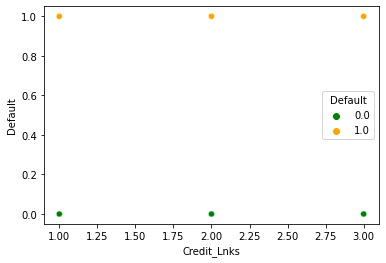

column is Experience


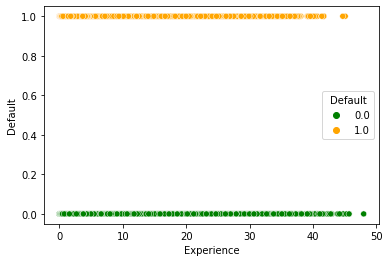

column is Income_Alt


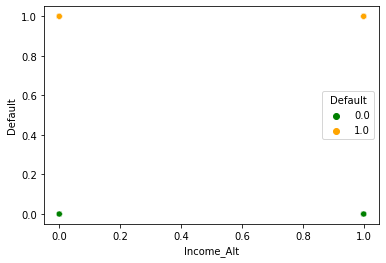

column is Ph.No


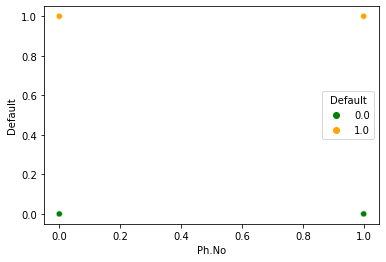

column is Dependents


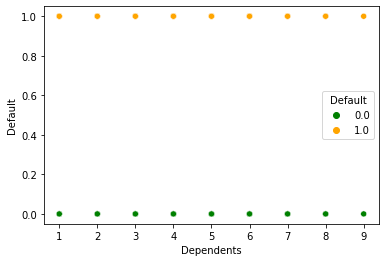

column is Company_Rating


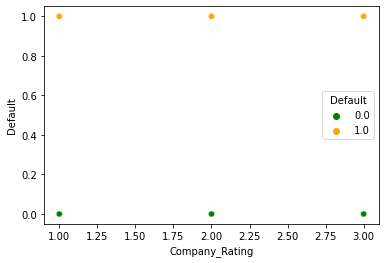

column is Age


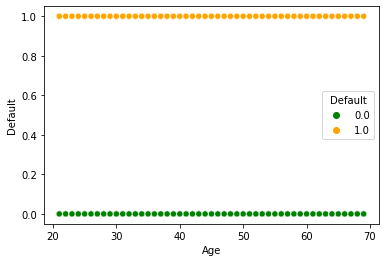

column is Addr_permanent


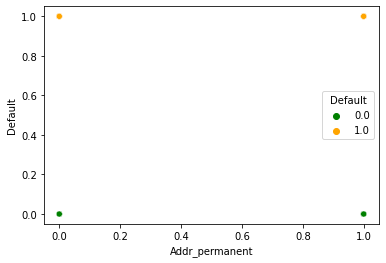

column is Permanent_Addr_tag


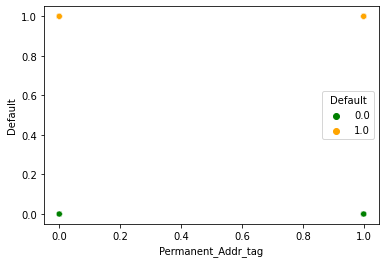

column is c1_rated


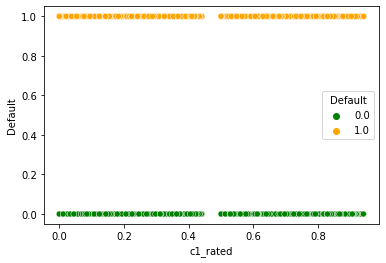

column is c2_rated


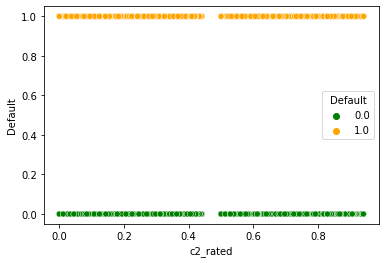

column is Contact_age


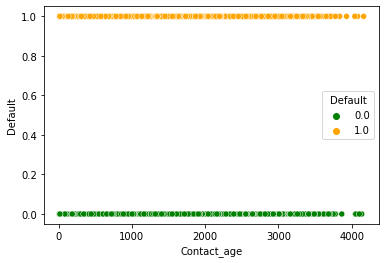

column is Product_bought


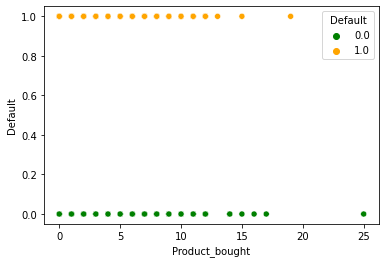

Nothing Default
column is Job_Type_Govt.


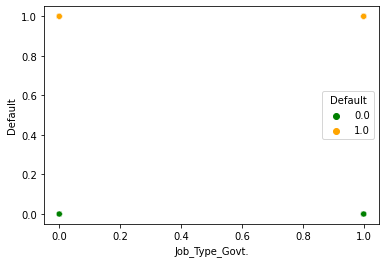

column is Job_Type_IT


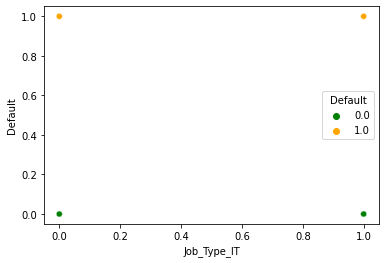

column is Job_Type_Non-IT


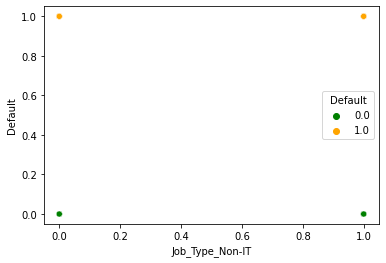

column is Region_Type_Metro


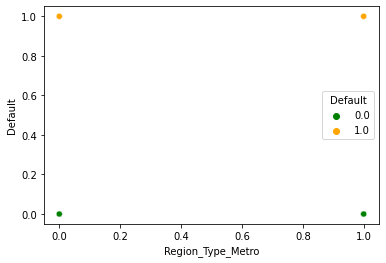

column is Region_Type_Rural


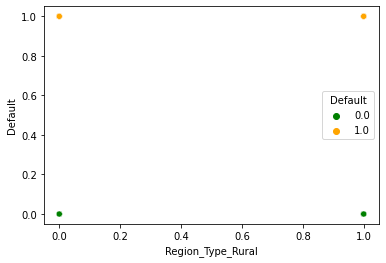

column is Region_Type_other


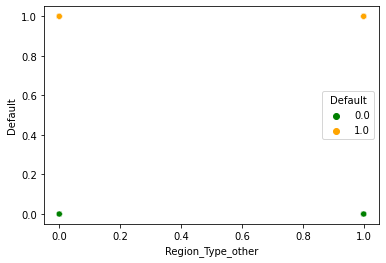

column is Type_Loan_CLoan


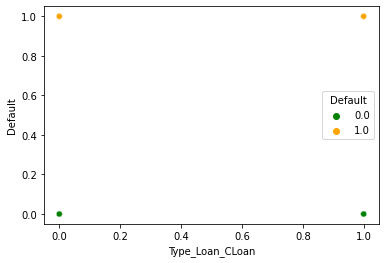

column is Type_Loan_RLoan


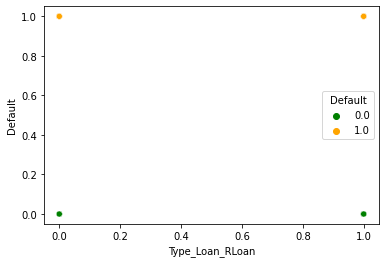

In [62]:
#.. Bivariate analysis.... Checking each independent variable with dependent variable ("Default")

for i in new_train.columns:
    if i == 'Default':
        print("Nothing",i)
    else:    
        print("column is",i)
        plt.figure()
        g=sns.scatterplot(x=i, y="Default",hue="Default",data=new_train,palette=['green','orange'], legend='full')
        plt.show()

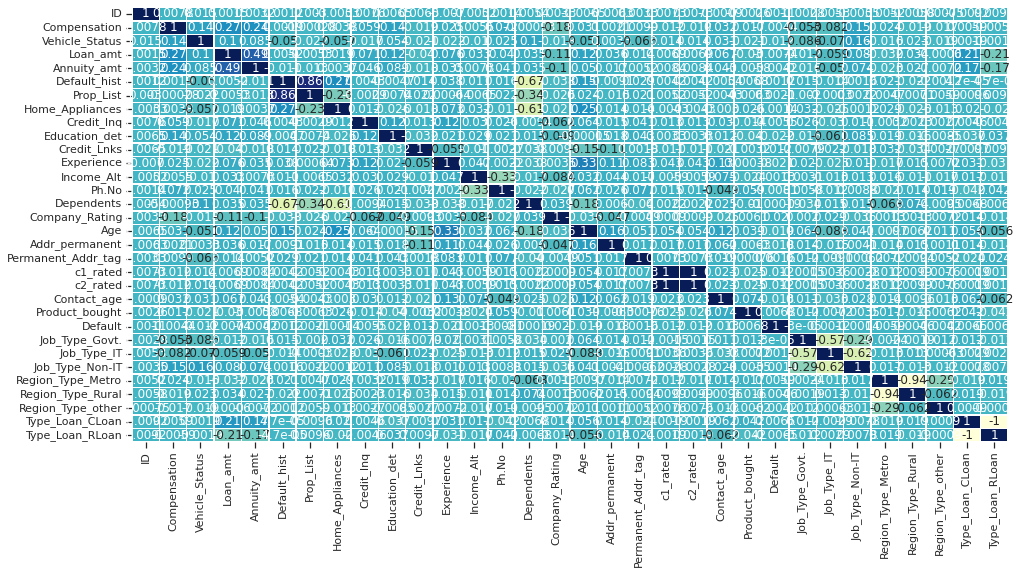

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(new_train.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

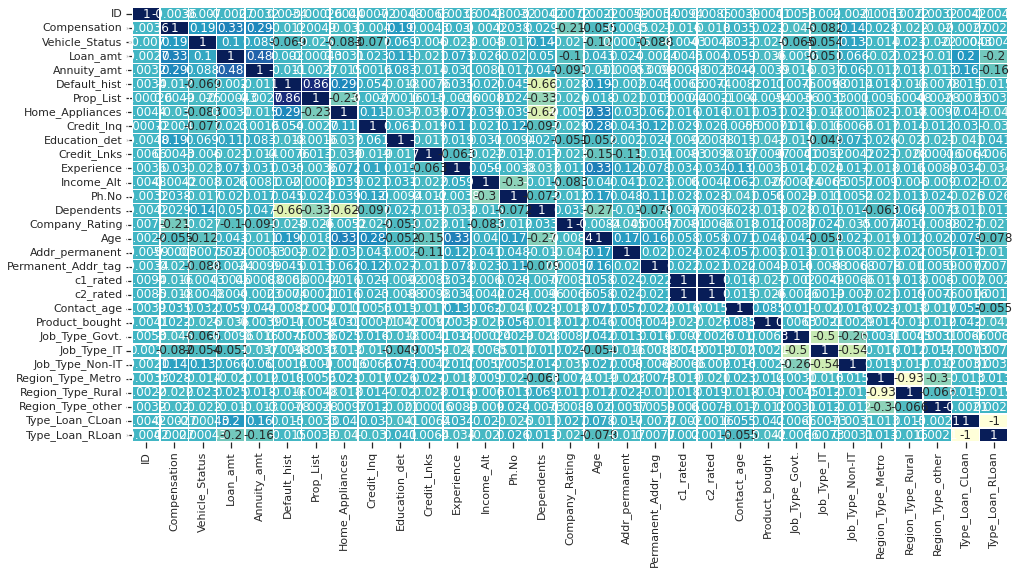

In [63]:
sns.set(rc={'figure.figsize':(15.7,8)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(new_test.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

Observations:

There doesnt seem to be any significant linear relationship between the independent and dependent variables for most of the columns Other than 
- Property list on applicant's name
- default history on applicant's name


## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [64]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import imblearn 
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore


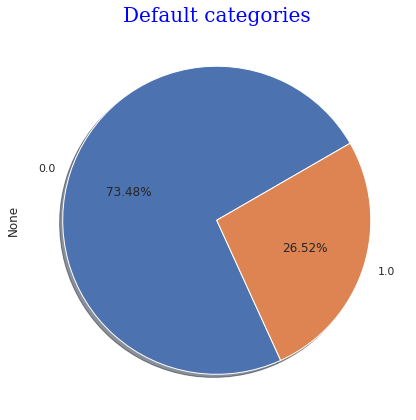

In [65]:
#Checking for imbalance in Target variable (Default)

new_train.groupby('Default').size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')
font1 = {'family':'serif','color':'blue','size':20}
plt.title("Default categories", fontdict = font1)    
                
plt.tight_layout()
plt.show()


In [66]:
new_train["Default"].value_counts()

0.0    34377
1.0    12407
Name: Default, dtype: int64

There is a major imbalance in Default (Target variable) .... there are only 26% defaulted customers Vs 74% non-defaulters

this has to be corrected else the algorithm will not predict defaults properly and will biased towards non-defaulters

In [67]:
#   Segregating Predictors and Target attributes

X = new_train.drop(["Default","ID"], axis=1)   #........... Independent variables / Predictors attribute, 
y = new_train['Default']                       #............Dependent variable / Target attribute

In [68]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [69]:
y.value_counts()    #........... the imbalance has been corrected now..........

0.0    34377
1.0    34377
Name: Default, dtype: int64

In [70]:
print("X.shape",X.shape)
print("y.shape",y.shape)

X.shape (68754, 30)
y.shape (68754,)


In [71]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Compensation,68754.0,766225.481303,443301.156192,166212.00,536862.436009,686505.000323,899007.500000,6.305288e+07
Vehicle_Status,68754.0,0.298455,0.457584,0.00,0.000000,0.000000,1.000000,1.000000e+00
Loan_amt,68754.0,421136.813156,275701.656508,34275.00,210697.250000,355035.500000,563746.400000,2.872142e+06
Annuity_amt,68754.0,10901.974419,1986.142073,5951.98,9486.432500,10826.930000,12164.098984,4.130100e+04
Default_hist,68754.0,0.849434,0.357628,0.00,1.000000,1.000000,1.000000,1.000000e+00
Prop_List,68754.0,0.945429,0.752301,-1.00,1.000000,1.000000,1.000000,2.000000e+00
Home_Appliances,68754.0,3.094500,1.225648,1.00,2.000000,4.000000,4.000000,1.900000e+01
Credit_Inq,68754.0,1.575530,1.042005,1.00,1.000000,1.000000,2.000000,5.000000e+00
Education_det,68754.0,1.138406,0.491738,0.00,1.000000,1.000000,1.000000,2.000000e+00
Credit_Lnks,68754.0,1.103441,0.332527,1.00,1.000000,1.000000,1.000000,3.000000e+00


In [72]:
#  ... Standardizing the Data

X_scaled = X.apply(zscore)

In [73]:
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Compensation,68754.0,-6.335089e-17,1.000007,-1.353522,-0.517402,-0.179835,0.299532,140.507444
Vehicle_Status,68754.0,-1.058260e-16,1.000007,-0.652247,-0.652247,-0.652247,1.533162,1.533162
Loan_amt,68754.0,2.513108e-16,1.000007,-1.403200,-0.763293,-0.239758,0.517264,8.890128
Annuity_amt,68754.0,3.566717e-16,1.000007,-2.492284,-0.712714,-0.037784,0.635470,15.305676
Default_hist,68754.0,-1.438572e-16,1.000007,-2.375208,0.421016,0.421016,0.421016,0.421016
Prop_List,68754.0,-6.614122e-18,1.000007,-2.585989,0.072540,0.072540,0.072540,1.401804
Home_Appliances,68754.0,-2.355248e-16,1.000007,-1.708905,-0.893003,0.738799,0.738799,12.977315
Credit_Inq,68754.0,-1.670066e-16,1.000007,-0.552333,-0.552333,-0.552333,0.407362,3.286447
Education_det,68754.0,9.921183e-17,1.000007,-2.315083,-0.281466,-0.281466,-0.281466,1.752151
Credit_Lnks,68754.0,1.851954e-16,1.000007,-0.311078,-0.311078,-0.311078,-0.311078,5.703508


In [74]:
#.... ..... Train & Validation splitting of Data......... in 80% Train & 20% Validation

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=.20, random_state=1)

## Model 1

In [75]:
# .... Train Logistic Regression model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_pred_logit = model.predict(X_val)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.037946 -0.173043  0.042089  0.009808 -0.438662  0.269754  0.096912   

          7         8         9  ...        21        22        23        24  \
0 -0.053314 -0.147221 -0.077031  ...  0.016468 -2.800247 -3.733359 -2.942169   

        25        26        27        28        29  intercept  
0 -2.96336 -2.380545 -0.837588 -2.229403 -1.831365   1.864559  

[1 rows x 31 columns]


In [76]:
model_score_train = model.score(X_train, y_train)
print(model_score_train)

0.7607039616020944


In [77]:
model_score_valid = model.score(X_val, y_val)
print(model_score_valid)

0.7539088066322449


Logistic Regression is giving a High Bias and absolutely no variance score......

Logistic regression 2 - Accuracy  0.7539088066322449
Logistic regression 2 - Precision 0.9527168234064786
Logistic regression 2 - Recall    0.5324087591240876
Logistic regression 2 - F1 score  0.6830867203596179
Logistic regression 2 - ROC       0.7530903381187746


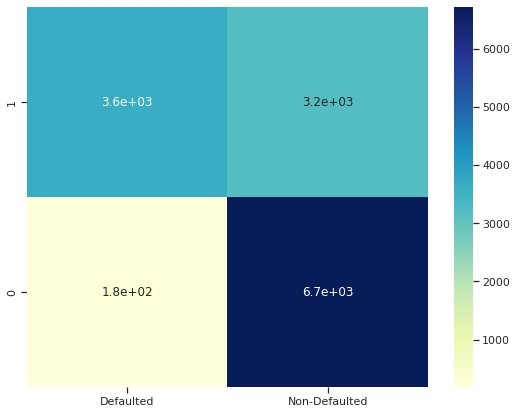

In [79]:
cm=metrics.confusion_matrix(y_val, y_pred_logit, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Defaulted","Non-Defaulted"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True,cmap="YlGnBu")

print("Logistic regression 2 - Accuracy ",metrics.accuracy_score(y_val, y_pred_logit))
print("Logistic regression 2 - Precision",metrics.precision_score(y_val, y_pred_logit))
print("Logistic regression 2 - Recall   ",metrics.recall_score(y_val, y_pred_logit))
print("Logistic regression 2 - F1 score ",metrics.f1_score(y_val, y_pred_logit))
print("Logistic regression 2 - ROC      ",metrics.roc_auc_score(y_val, y_pred_logit))


In [80]:
print("new train shape",new_train.shape)
print("new test shape",new_test.shape)

new train shape (46784, 32)
new test shape (56760, 31)


In [81]:
#Predicting the actual Test_data which has been given separately

X_test = new_test.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)

y_pred_test_logit = model.predict(X_test)

ValueError: ignored

In [ ]:
y_pred_test_logit

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
unique, counts = np.unique(y_pred_test_logit, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[1.0000e+00 2.0008e+04]]


In [ ]:
Logit_test_pred = new_test["ID"]

In [ ]:
pred_df = pd.DataFrame(y_pred_test_logit)

In [ ]:
pred_df.value_counts()

1.0    20008
dtype: int64

In [ ]:
Logit_test_pred.count()

20008

In [ ]:
Logit_test_pred.shape

(20008,)

In [ ]:
#reset index 
Logit_test_pred = Logit_test_pred.reset_index(drop=True)
pred_df         = pred_df.reset_index(drop=True)

In [ ]:
result = pd.concat([Logit_test_pred,pred_df],axis=1)

In [ ]:
result.shape

(20008, 2)

In [ ]:
result.columns = ['ID', 'Default']

In [ ]:
result

,ID,Default
0,487410,1.0
1,533258,1.0
2,486301,1.0
3,469888,1.0
4,567067,1.0
...,...,...
20003,553385,1.0
20004,426709,1.0
20005,585595,1.0
20006,513665,1.0


In [ ]:
result["Default"].value_counts()

1.0    20008
Name: Default, dtype: int64

In [ ]:
Logistic_pred = Original_Test_set["ID"]

In [ ]:
Logistic_pred

0        487410
1        533258
2        581926
3        486301
4        580822
          ...  
56755    513665
56756    450327
56757    476417
56758    461152
56759    524075
Name: ID, Length: 56760, dtype: int64

In [ ]:
#reset index 
Logistic_pred = Logistic_pred.reset_index(drop=True)
result = result.reset_index(drop=True)

In [ ]:
Logistic_final_pred=result.merge(Logistic_pred, how='outer')

In [ ]:
Logistic_final_pred

,ID,Default
0,487410,1.0
1,533258,1.0
2,486301,1.0
3,469888,1.0
4,567067,1.0
...,...,...
56755,567048,NaN
56756,506493,NaN
56757,450327,NaN
56758,476417,NaN


In [ ]:
Logistic_final_pred.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Computer vision/Ramesh_Gopinath_logistic_prediction_1.csv')

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

In this approach I have done the following
- dropped blank rows in Train dataset and Test dataset
- dropped 5 columns which was not adding value to the target variable both in Train and Test dataset
- Label encoded 10 columns in Train and Test dataset
- OneHotencoded 3 columns in Train and Test dataset
- Found an imbalance in the distribution of Default in Training set, 74% Non-default and 26% Default, hence upsampled the Training set to balance the Target variable
- Used 80% of the Training set as Training data and 20% of Training set as "Validation data"

and finally Predicted the Defaulting on the subset of Test dataset

Predicted it on 20,000 rows of data instead of the 56,000+ Test dataset

Hence have predictions only for 20,000+ rows of Test data and not for the Full Test dataset.

The Logistic regression model predicts all the 20,000 rows of data as Non-defaulters. So loans can easily be given to the 35% of the applicants predicted in the Test dataset.

It is also very important not to have blank rows in so much of data, so it is highly recommended that Data gatherers should ensure all the data should be captured to enable better predictions

